#**Notebook 1**
## Using Demographics to Predict Responses to a Question or Category of Questions

##Import and read the cleaned dataset

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Load dataset
df = pd.read_csv('/content/UConn_SJI_Cleaned_Data_With_Demographics.csv')  # Update path if needed
df.head()



,Participant,S01_c1,S01_c2,S01_c3,S01_c4,S01_c5,S02_c1,S02_c2,S02_c3,S02_c4,...,S18_c3,S18_c4,S18_c5,S19_c1,S19_c2,S19_c3,S19_c4,S19_c5,Race,Gender
0,126,0,1,-1,0,0,1,0,-1,0,...,0,1,0,-1,1,0,0,0,Black,Man
1,127,-1,0,0,1,0,0,-1,1,0,...,-1,0,0,-1,0,0,1,0,Other,Man
2,128,0,1,0,0,-1,0,0,0,-1,...,-1,1,0,0,-1,0,1,0,Other,Man
3,129,-1,1,0,0,0,-1,0,1,0,...,0,1,0,0,-1,0,0,1,White,Man
4,130,-1,1,0,0,0,-1,1,0,0,...,0,0,0,-1,0,0,1,0,Other,Woman


##Create Train and Test Split

In [ ]:
# Create consistent 50/50 split
np.random.seed(42)
df['split'] = np.random.choice(['train', 'test'], size=len(df), p=[0.5, 0.5])


##One-hot Encode Demographic

In [ ]:
# Define categories explicitly (so "Man" and "White" are baselines)
df['Gender'] = pd.Categorical(df['Gender'], categories=['Man', 'Woman', 'Other'])
df['Race'] = pd.Categorical(df['Race'], categories=['White', 'Black', 'Asian', 'Other'])

# One-hot encode (drops the first category = baseline)
df = pd.get_dummies(df, columns=['Gender', 'Race'], drop_first=True)

# Check which dummy columns were created
[col for col in df.columns if 'Gender' in col or 'Race' in col]


['Gender_Woman', 'Gender_Other', 'Race_Black', 'Race_Asian', 'Race_Other']

In [ ]:
# Define predictors and target
demo_cols = ['Gender_Woman', 'Gender_Other', 'Race_Black', 'Race_Asian', 'Race_Other']
target_col = 'S01_c1'

X_train = df[df['split'] == 'train'][demo_cols]
y_train = df[df['split'] == 'train'][target_col]

X_test  = df[df['split'] == 'test'][demo_cols]
y_test  = df[df['split'] == 'test'][target_col]

# Fit model
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_pred = linreg.predict(X_test)

# Evaluate
print(f"R² Score: {r2_score(y_test, y_pred):.3f}")
print(f"MSE: {mean_squared_error(y_test, y_pred):.3f}")

# Coefficients
pd.DataFrame({
    "Variable": demo_cols,
    "Coefficient": linreg.coef_
})



R² Score: -0.045
MSE: 0.380


,Variable,Coefficient
0,Gender_Woman,-0.317042
1,Gender_Other,0.100502
2,Race_Black,-0.693087
3,Race_Asian,-0.742551
4,Race_Other,-0.645196


# Logistic Regression Model

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

# Load dataset
df = pd.read_csv('UConn_SJI_signed_onehot.csv')


In [ ]:
# Inspect key columns
print("Columns in dataset:", df.columns.tolist())
print("\nPreview of demographic columns:\n", df[['DQ4', 'DQ5']].head())

Columns in dataset: ['Participant', 'S01_c1', 'S01_c2', 'S01_c3', 'S01_c4', 'S01_c5', 'S02_c1', 'S02_c2', 'S02_c3', 'S02_c4', 'S02_c5', 'S03_c1', 'S03_c2', 'S03_c3', 'S03_c4', 'S03_c5', 'S04_c1', 'S04_c2', 'S04_c3', 'S04_c4', 'S04_c5', 'S05_c1', 'S05_c2', 'S05_c3', 'S05_c4', 'S05_c5', 'S06_c1', 'S06_c2', 'S06_c3', 'S06_c4', 'S06_c5', 'S07_c1', 'S07_c2', 'S07_c3', 'S07_c4', 'S07_c5', 'S08_c1', 'S08_c2', 'S08_c3', 'S08_c4', 'S08_c5', 'S09_c1', 'S09_c2', 'S09_c3', 'S09_c4', 'S09_c5', 'S10_c1', 'S10_c2', 'S10_c3', 'S10_c4', 'S10_c5', 'S11_c1', 'S11_c2', 'S11_c3', 'S11_c4', 'S11_c5', 'S12_c1', 'S12_c2', 'S12_c3', 'S12_c4', 'S12_c5', 'S13_c1', 'S13_c2', 'S13_c3', 'S13_c4', 'S13_c5', 'S14_c1', 'S14_c2', 'S14_c3', 'S14_c4', 'S14_c5', 'S15_c1', 'S15_c2', 'S15_c3', 'S15_c4', 'S15_c5', 'S16_c1', 'S16_c2', 'S16_c3', 'S16_c4', 'S16_c5', 'S17_c1', 'S17_c2', 'S17_c3', 'S17_c4', 'S17_c5', 'S18_c1', 'S18_c2', 'S18_c3', 'S18_c4', 'S18_c5', 'S19_c1', 'S19_c2', 'S19_c3', 'S19_c4', 'S19_c5', 'DQ4', 'DQ5']


In [ ]:
# Select features and target
predictors = ['DQ4', 'DQ5']       # Neurodiversity and Gender
target = 'S01_c1'                  # Target question

# Drop any missing values in relevant columns
df = df.dropna(subset=predictors + [target])

In [ ]:
# One-hot encode categorical predictors
encoder = OneHotEncoder(drop='first', sparse_output=False)
X_encoded = encoder.fit_transform(df[predictors])

# Create a DataFrame with encoded column names
encoded_cols = encoder.get_feature_names_out(predictors)
X = pd.DataFrame(X_encoded, columns=encoded_cols)

# Target variable
y = df[target]
if y.dtype == 'object':
    y = y.astype('category').cat.codes

In [ ]:
# Split data into train/test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    train_size=0.5,  # 50%
    test_size=0.5,
    random_state=42,
    stratify=y       # keep class balance
)


In [ ]:
# Build logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
# Predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Misclassification rates
train_misclass = 1 - accuracy_score(y_train, y_pred_train)
test_misclass = 1 - accuracy_score(y_test, y_pred_test)

# Create a table
misclass_table = pd.DataFrame({
    'Dataset': ['Train', 'Test'],
    'Misclassification Rate': [train_misclass, test_misclass],
    'Accuracy': [1 - train_misclass, 1 - test_misclass]
})

print("\nModel Misclassification Rates:")
print(misclass_table.to_string(index=False))



Model Misclassification Rates:
Dataset  Misclassification Rate  Accuracy
  Train                0.479167  0.520833
   Test                0.708333  0.291667


#Function to Create Multiple Models

In [ ]:
# Imports
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

In [ ]:
def build_and_eval_question_model(
    df: pd.DataFrame,
    target_col: str,
    demo_cols=('DQ4', 'DQ5'),
    C=1.0,
    random_state=42
):

    # Keep only required columns; drop rows missing either demos or target
    cols_needed = list(demo_cols) + [target_col]
    data = df[cols_needed].dropna(subset=cols_needed).copy()

    # Features: ONLY DQ4 & DQ5
    X = data[list(demo_cols)]
    y = data[target_col]

    # Preprocess demos with OHE (drop first level to avoid collinearity)
    preproc = ColumnTransformer(
        transformers=[('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), list(demo_cols))],
        remainder='drop'
    )

    # Multiclass works automatically; liblinear for binary, lbfgs for multi handled by default settings
    logit = LogisticRegression(
        class_weight='balanced',
        C=C,
        max_iter=1000,
        random_state=random_state
    )

    pipe = Pipeline(steps=[
        ('prep', preproc),
        ('clf', logit)
    ])

    # 50/50 split with stratification to preserve label distribution
    X_train, X_test, y_train, y_test = train_test_split(
        X, y,
        train_size=0.5,
        test_size=0.5,
        random_state=random_state,
        stratify=y
    )

    # Fit and predict
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)

    # Metrics
    acc = accuracy_score(y_test, y_pred)
    misclass_rate = 1 - acc
    f1_macro = f1_score(y_test, y_pred, average='macro')
    f1_weighted = f1_score(y_test, y_pred, average='weighted')
    cm = confusion_matrix(y_test, y_pred)

    print(f"=== Logistic Regression (target: {target_col}) ===")
    print("Features used: DQ4 (Neurodiversity) + DQ5 (Gender) [one-hot encoded]")
    print("Train/Test split: 50% / 50% (stratified)\n")
    print(f"Accuracy: {acc:.3f} | Misclassification Rate: {misclass_rate:.3f}")
    print(f"F1 (macro): {f1_macro:.3f} | F1 (weighted): {f1_weighted:.3f}\n")


    # Build a coefficient table with odds ratios
    ohe = pipe.named_steps['prep'].named_transformers_['cat']
    feature_names = ohe.get_feature_names_out(list(demo_cols))
    clf = pipe.named_steps['clf']

    # Handle binary vs multiclass: coef_.shape = (n_classes, n_features) for multi
    if clf.coef_.ndim == 1 or clf.coef_.shape[0] == 1:
        coefs = clf.coef_.ravel()
        coef_table = pd.DataFrame({
            'feature': feature_names,
            'coef': coefs,
            'odds_ratio': np.exp(coefs)
        }).sort_values('feature').reset_index(drop=True)
    else:
        rows = []
        for k, cls in enumerate(clf.classes_):
            c = clf.coef_[k]
            rows.append(pd.DataFrame({
                'class': cls,
                'feature': feature_names,
                'coef': c,
                'odds_ratio': np.exp(c)
            }))
        coef_table = pd.concat(rows, ignore_index=True).sort_values(['class','feature']).reset_index(drop=True)

    return {
        'pipeline': pipe,
        'metrics': {
            'accuracy': acc,
            'misclassification_rate': misclass_rate,
            'f1_macro': f1_macro,
            'f1_weighted': f1_weighted,
            'confusion_matrix': cm
        },
        'coef_table': coef_table,
        'X_train': X_train, 'X_test': X_test,
        'y_train': y_train, 'y_test': y_test
    }


## Question 1
"Your first round of tests did not go well and your usual studying habits are not working"

In [ ]:
# Question 1 Choice 1
# "Wait until the next round of tests to see if you’ll do better"

res = build_and_eval_question_model(df, target_col="S01_c1")
res['coef_table'].head()


=== Logistic Regression (target: S01_c1) ===
Features used: DQ4 (Neurodiversity) + DQ5 (Gender) [one-hot encoded]
Train/Test split: 50% / 50% (stratified)

Accuracy: 0.396 | Misclassification Rate: 0.604
F1 (macro): 0.323 | F1 (weighted): 0.358



,class,feature,coef,odds_ratio
0,-1,DQ4_No,0.482783,1.620578
1,-1,DQ4_Prefer not to answer,-0.149886,0.860806
2,-1,"DQ4_Yes, and I do not have an accommodation",0.406801,1.502006
3,-1,"DQ4_Yes, and I have an accommodation at my uni...",-0.517409,0.596063
4,-1,DQ5_Prefer not to answer,-0.267839,0.765031


In [ ]:
# Question 1 Choice 2
# "Review your first round of tests once you get them back to understand your mistakes"

res = build_and_eval_question_model(df, target_col="S01_c2")
res['coef_table'].head()

=== Logistic Regression (target: S01_c2) ===
Features used: DQ4 (Neurodiversity) + DQ5 (Gender) [one-hot encoded]
Train/Test split: 50% / 50% (stratified)

Accuracy: 0.562 | Misclassification Rate: 0.438
F1 (macro): 0.426 | F1 (weighted): 0.558



,class,feature,coef,odds_ratio
0,-1,DQ4_No,-1.523292,0.217993
1,-1,DQ4_Prefer not to answer,-0.610557,0.543048
2,-1,"DQ4_Yes, and I do not have an accommodation",-0.840640,0.431434
3,-1,"DQ4_Yes, and I have an accommodation at my uni...",-0.758525,0.468357
4,-1,DQ5_Prefer not to answer,-0.184048,0.831896


In [ ]:
# Question 1 Choice 3
# "Make and work with a study group with peers in your classes to better understand the material"

res = build_and_eval_question_model(df, target_col="S01_c3")
res['coef_table'].head()

=== Logistic Regression (target: S01_c3) ===
Features used: DQ4 (Neurodiversity) + DQ5 (Gender) [one-hot encoded]
Train/Test split: 50% / 50% (stratified)

Accuracy: 0.375 | Misclassification Rate: 0.625
F1 (macro): 0.265 | F1 (weighted): 0.396



,class,feature,coef,odds_ratio
0,-1,DQ4_No,0.198636,1.219738
1,-1,DQ4_Prefer not to answer,-0.175483,0.839051
2,-1,"DQ4_Yes, and I do not have an accommodation",-0.319608,0.726434
3,-1,"DQ4_Yes, and I have an accommodation at my uni...",0.634520,1.886116
4,-1,DQ5_Prefer not to answer,0.856739,2.355467


In [ ]:
# Question 1 Choice 4
# "Start going to office hours regularly for each of your courses"

res = build_and_eval_question_model(df, target_col="S01_c4")
res['coef_table'].head()

=== Logistic Regression (target: S01_c4) ===
Features used: DQ4 (Neurodiversity) + DQ5 (Gender) [one-hot encoded]
Train/Test split: 50% / 50% (stratified)

Accuracy: 0.438 | Misclassification Rate: 0.562
F1 (macro): 0.323 | F1 (weighted): 0.477



,class,feature,coef,odds_ratio
0,-1,DQ4_No,1.180853,3.257152
1,-1,DQ4_Prefer not to answer,-0.133332,0.875174
2,-1,"DQ4_Yes, and I do not have an accommodation",-0.339095,0.712415
3,-1,"DQ4_Yes, and I have an accommodation at my uni...",0.652801,1.920913
4,-1,DQ5_Prefer not to answer,-0.214797,0.806705


In [ ]:
# Question 1 Choice 5
# "Visit the student success center to learn a new study method"

res = build_and_eval_question_model(df, target_col="S01_c5")
res['coef_table'].head()

=== Logistic Regression (target: S01_c5) ===
Features used: DQ4 (Neurodiversity) + DQ5 (Gender) [one-hot encoded]
Train/Test split: 50% / 50% (stratified)

Accuracy: 0.479 | Misclassification Rate: 0.521
F1 (macro): 0.350 | F1 (weighted): 0.522



/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


,class,feature,coef,odds_ratio
0,-1,DQ4_No,-0.200930,0.817970
1,-1,DQ4_Prefer not to answer,0.533380,1.704685
2,-1,"DQ4_Yes, and I do not have an accommodation",0.182837,1.200618
3,-1,"DQ4_Yes, and I have an accommodation at my uni...",0.633203,1.883635
4,-1,DQ5_Woman,-0.276729,0.758260


##Question 7
"You are taking a difficult course load and begin feeling overwhelmed"

In [ ]:
# Question 7 Choice 1
# "Push through your challenging courses knowing the semester will eventually end"

res = build_and_eval_question_model(df, target_col="S07_c1")
res['coef_table'].head()

=== Logistic Regression (target: S07_c1) ===
Features used: DQ4 (Neurodiversity) + DQ5 (Gender) [one-hot encoded]
Train/Test split: 50% / 50% (stratified)

Accuracy: 0.333 | Misclassification Rate: 0.667
F1 (macro): 0.325 | F1 (weighted): 0.272



,class,feature,coef,odds_ratio
0,-1,DQ4_No,-0.315939,0.729104
1,-1,DQ4_Prefer not to answer,-0.156993,0.854710
2,-1,"DQ4_Yes, and I do not have an accommodation",-0.055303,0.946198
3,-1,"DQ4_Yes, and I have an accommodation at my uni...",0.318677,1.375307
4,-1,DQ5_Prefer not to answer,-0.184540,0.831486


In [ ]:
# Question 7 Choice 2
# "Find instructional videos to watch online to support your learning outside of class"

res = build_and_eval_question_model(df, target_col="S07_c2")
res['coef_table'].head()

=== Logistic Regression (target: S07_c2) ===
Features used: DQ4 (Neurodiversity) + DQ5 (Gender) [one-hot encoded]
Train/Test split: 50% / 50% (stratified)

Accuracy: 0.542 | Misclassification Rate: 0.458
F1 (macro): 0.534 | F1 (weighted): 0.559



,feature,coef,odds_ratio
0,DQ4_No,-0.096577,0.907940
1,DQ4_Prefer not to answer,0.453732,1.574176
2,"DQ4_Yes, and I do not have an accommodation",-0.813318,0.443384
3,"DQ4_Yes, and I have an accommodation at my uni...",-0.331260,0.718018
4,DQ5_Prefer not to answer,-0.200712,0.818148


In [ ]:
# Question 7 Choice 3
# "Make and work with a study group of peers from your classes"

res = build_and_eval_question_model(df, target_col="S03_c3")
res['coef_table'].head()

=== Logistic Regression (target: S03_c3) ===
Features used: DQ4 (Neurodiversity) + DQ5 (Gender) [one-hot encoded]
Train/Test split: 50% / 50% (stratified)

Accuracy: 0.354 | Misclassification Rate: 0.646
F1 (macro): 0.297 | F1 (weighted): 0.410



,class,feature,coef,odds_ratio
0,-1,DQ4_No,0.260384,1.297428
1,-1,DQ4_Prefer not to answer,-0.167598,0.845694
2,-1,"DQ4_Yes, and I do not have an accommodation",-0.336148,0.714517
3,-1,"DQ4_Yes, and I have an accommodation at my uni...",0.681204,1.976255
4,-1,DQ5_Prefer not to answer,-0.126612,0.881075


In [ ]:
# Question 7 Choice 4
# "Ask your advisor for advice about time management"

res = build_and_eval_question_model(df, target_col="S07_c4")
res['coef_table'].head()

=== Logistic Regression (target: S07_c4) ===
Features used: DQ4 (Neurodiversity) + DQ5 (Gender) [one-hot encoded]
Train/Test split: 50% / 50% (stratified)

Accuracy: 0.458 | Misclassification Rate: 0.542
F1 (macro): 0.325 | F1 (weighted): 0.410



,class,feature,coef,odds_ratio
0,-1,DQ4_No,-0.584663,0.557293
1,-1,DQ4_Prefer not to answer,0.006145,1.006164
2,-1,"DQ4_Yes, and I do not have an accommodation",-0.222977,0.800133
3,-1,"DQ4_Yes, and I have an accommodation at my uni...",0.094549,1.099163
4,-1,DQ5_Prefer not to answer,-0.266696,0.765906


In [ ]:
# Question 7 Choice 5
# "Get tutoring for your courses from the student success center"

res = build_and_eval_question_model(df, target_col="S07_c5")
res['coef_table'].head()

=== Logistic Regression (target: S07_c5) ===
Features used: DQ4 (Neurodiversity) + DQ5 (Gender) [one-hot encoded]
Train/Test split: 50% / 50% (stratified)

Accuracy: 0.208 | Misclassification Rate: 0.792
F1 (macro): 0.167 | F1 (weighted): 0.255



/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


,class,feature,coef,odds_ratio
0,-1,DQ4_No,0.754887,2.127370
1,-1,DQ4_Prefer not to answer,-0.183000,0.832768
2,-1,"DQ4_Yes, and I do not have an accommodation",-0.365985,0.693514
3,-1,"DQ4_Yes, and I have an accommodation at my uni...",0.854554,2.350325
4,-1,DQ5_Woman,-1.433327,0.238514


##Question 10

"You are at the risk of failing a required course and the withdraw/drop deadline is approaching"

In [ ]:
# Question 10 Choice 1
# "Wait and see how you’re doing in the course once the deadline is closer"

res = build_and_eval_question_model(df, target_col="S10_c1")
res['coef_table'].head()

=== Logistic Regression (target: S10_c1) ===
Features used: DQ4 (Neurodiversity) + DQ5 (Gender) [one-hot encoded]
Train/Test split: 50% / 50% (stratified)

Accuracy: 0.458 | Misclassification Rate: 0.542
F1 (macro): 0.334 | F1 (weighted): 0.417



,class,feature,coef,odds_ratio
0,-1,DQ4_No,-0.098712,0.906003
1,-1,DQ4_Prefer not to answer,0.182422,1.200121
2,-1,"DQ4_Yes, and I do not have an accommodation",0.182422,1.200121
3,-1,"DQ4_Yes, and I have an accommodation at my uni...",0.821501,2.273911
4,-1,DQ5_Prefer not to answer,0.238660,1.269547


In [ ]:
# Question 10 Choice 2
# "Spend more time studying for the course to try to bring up your grade"

res = build_and_eval_question_model(df, target_col="S10_c2")
res['coef_table'].head()

=== Logistic Regression (target: S10_c2) ===
Features used: DQ4 (Neurodiversity) + DQ5 (Gender) [one-hot encoded]
Train/Test split: 50% / 50% (stratified)

Accuracy: 0.312 | Misclassification Rate: 0.688
F1 (macro): 0.287 | F1 (weighted): 0.243



/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


,feature,coef,odds_ratio
0,DQ4_No,0.014114,1.014214
1,"DQ4_Yes, and I do not have an accommodation",-0.936925,0.391831
2,"DQ4_Yes, and I have an accommodation at my uni...",-1.038310,0.354052
3,DQ5_Prefer not to answer,-0.500745,0.606079
4,DQ5_Woman,-0.250523,0.778394


In [ ]:
# Question 10 Choice 3
# "Ask a friend for help on the material you are struggling with to try to bring up your grade"

res = build_and_eval_question_model(df, target_col="S10_c3")
res['coef_table'].head()

=== Logistic Regression (target: S10_c3) ===
Features used: DQ4 (Neurodiversity) + DQ5 (Gender) [one-hot encoded]
Train/Test split: 50% / 50% (stratified)

Accuracy: 0.167 | Misclassification Rate: 0.833
F1 (macro): 0.151 | F1 (weighted): 0.197



,class,feature,coef,odds_ratio
0,-1,DQ4_No,0.631996,1.881362
1,-1,DQ4_Prefer not to answer,-0.077676,0.925264
2,-1,"DQ4_Yes, and I do not have an accommodation",-0.368456,0.691802
3,-1,"DQ4_Yes, and I have an accommodation at my uni...",-0.198540,0.819927
4,-1,DQ5_Prefer not to answer,-0.056291,0.945264


In [ ]:
# Question 10 Choice 4
# "Talk to your academic advisor for advice about dropping the course"

res = build_and_eval_question_model(df, target_col="S10_c4")
res['coef_table'].head()

=== Logistic Regression (target: S10_c4) ===
Features used: DQ4 (Neurodiversity) + DQ5 (Gender) [one-hot encoded]
Train/Test split: 50% / 50% (stratified)

Accuracy: 0.312 | Misclassification Rate: 0.688
F1 (macro): 0.305 | F1 (weighted): 0.321



/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0, 1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


,class,feature,coef,odds_ratio
0,-1,DQ4_No,-0.512414,0.599048
1,-1,DQ4_Prefer not to answer,-0.543074,0.580960
2,-1,"DQ4_Yes, and I have an accommodation at my uni...",-0.185845,0.830403
3,-1,DQ5_Woman,-0.182083,0.833532
4,0,DQ4_No,-0.036220,0.964428


In [ ]:
# Question 10 Choice 5
# "Get tutoring for your courses from the student success center"

res = build_and_eval_question_model(df, target_col="S10_c5")
res['coef_table'].head()

=== Logistic Regression (target: S10_c5) ===
Features used: DQ4 (Neurodiversity) + DQ5 (Gender) [one-hot encoded]
Train/Test split: 50% / 50% (stratified)

Accuracy: 0.271 | Misclassification Rate: 0.729
F1 (macro): 0.250 | F1 (weighted): 0.307



/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


,class,feature,coef,odds_ratio
0,-1,DQ4_No,-0.350891,0.704061
1,-1,DQ4_Prefer not to answer,-0.214795,0.806707
2,-1,"DQ4_Yes, and I do not have an accommodation",-0.458900,0.631979
3,-1,"DQ4_Yes, and I have an accommodation at my uni...",-0.828659,0.436635
4,-1,DQ5_Woman,-1.044353,0.351920


#Revised Predictor Models

In [3]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split


target_col = "S01_c1"

# Read Data In
df = pd.read_csv("/content/UConn_SJI_signed_onehot.csv")


In [4]:
# Group DQ4 (Neurodiversity) and DQ5 (Gender)

def recode_neuro(val):
    if val in [
        "Yes, and I have an accommodation at my university",
        "Yes, and I do not have an accommodation"
    ]:
        return "Yes-Neuro"

    elif val == "No":
        return "No-Neuro"

    elif val == "I think I might be but do not have a diagnosis":
        return "Maybe-Neuro"

    else:
        # Prefer not to answer
        return None

def recode_gender(val):
    if val == "Woman":
        return "F-Gender"

    elif val == "Man":
        return "M-Gender"

    else:
        # Prefer not to answer
        return None

df["NeuroGroup"] = df["DQ4"].apply(recode_neuro)
df["GenderGroup"] = df["DQ5"].apply(recode_gender)

df_clean = df.dropna(subset=["NeuroGroup", "GenderGroup", target_col]).copy()
df_clean = df_clean.reset_index(drop=True)


In [5]:
# One-hot encode predictors with baselines

neuro_cat = pd.Categorical(
    df_clean["NeuroGroup"],
    categories=["No-Neuro", "Maybe-Neuro", "Yes-Neuro"],  # baseline = No-Neuro
    ordered=True
)

gender_cat = pd.Categorical(
    df_clean["GenderGroup"],
    categories=["M-Gender", "F-Gender"],  # baseline = M-Gender
    ordered=True
)

 # drop No-Neuro and M-Gender
X = pd.get_dummies(
    pd.DataFrame({"NeuroGroup": neuro_cat, "GenderGroup": gender_cat}),
    drop_first=True
)

# -1 = least likely, 0 = not selected, 1 = most likely
y = df_clean[target_col].astype(int)


In [6]:
# 50/50 Train/Test split (stratified by class)

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.5,
    random_state=42,
    stratify=y
)

# Fit Logistic Regression (One-vs-rest: separate model for -1, 0, and 1)

log_reg = LogisticRegression(
    max_iter=1000,
    multi_class="ovr",
    solver="liblinear"
)

log_reg.fit(X_train, y_train)



/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=1000, multi_class='ovr', solver='liblinear')

In [7]:
# Results

y_pred = log_reg.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
misclassification = 1 - accuracy

print(f"=== Logistic Regression (target: {target_col}) ===")
print("Features used: DQ4 (Neurodiversity) + DQ5 (Gender) [recoded + one-hot encoded]")
print("Train/Test split: 50% / 50% (stratified)\n")

print(f"Accuracy: {accuracy:.3f} | Misclassification Rate: {misclassification:.3f}")

rows = []
for class_idx, class_label in enumerate(log_reg.classes_):
    for feat_idx, feat_name in enumerate(X.columns):
        coef = log_reg.coef_[class_idx, feat_idx]
        rows.append({
            "class": class_label,
            "feature": feat_name,
            "coef": coef,
            "odds_ratio": np.exp(coef)
        })

coef_df = pd.DataFrame(rows)
coef_df

=== Logistic Regression (target: S01_c1) ===
Features used: DQ4 (Neurodiversity) + DQ5 (Gender) [recoded + one-hot encoded]
Train/Test split: 50% / 50% (stratified)

Accuracy: 0.500 | Misclassification Rate: 0.500


,class,feature,coef,odds_ratio
0,-1,NeuroGroup_Maybe-Neuro,-0.320512,0.725777
1,-1,NeuroGroup_Yes-Neuro,-0.149382,0.861240
2,-1,GenderGroup_F-Gender,0.444041,1.558995
3,0,NeuroGroup_Maybe-Neuro,-0.056109,0.945436
4,0,NeuroGroup_Yes-Neuro,-0.165767,0.847244
5,0,GenderGroup_F-Gender,-0.066412,0.935745
6,1,NeuroGroup_Maybe-Neuro,0.319594,1.376568
7,1,NeuroGroup_Yes-Neuro,0.253707,1.288794
8,1,GenderGroup_F-Gender,-0.972251,0.378231


##Revised Model Function

In [8]:
def build_and_eval_question_model(
    df: pd.DataFrame,
    target_col: str,
    test_size: float = 0.5,
    random_state: int = 42
):

    # Group DQ4 (Neurodiversity) and DQ5 (Gender)
    def recode_neuro(val):
        if val in [
            "Yes, and I have an accommodation at my university",
            "Yes, and I do not have an accommodation"
        ]:
            return "Yes-Neuro"
        elif val == "No":
            return "No-Neuro"
        elif val == "I think I might be but do not have a diagnosis":
            return "Maybe-Neuro"
        else:
            # Prefer not to answer
            return None

    def recode_gender(val):
        if val == "Woman":
            return "F-Gender"
        elif val == "Man":
            return "M-Gender"
        else:
            # Prefer not to answer
            return None

    df_work = df.copy()
    df_work["NeuroGroup"] = df_work["DQ4"].apply(recode_neuro)
    df_work["GenderGroup"] = df_work["DQ5"].apply(recode_gender)

    df_clean = df_work.dropna(subset=["NeuroGroup", "GenderGroup", target_col]).copy()
    df_clean = df_clean.reset_index(drop=True)

    # One-hot encode predictors with baselines
    # Baselines: No-Neuro and M-Gender

    neuro_cat = pd.Categorical(
        df_clean["NeuroGroup"],
        categories=["No-Neuro", "Maybe-Neuro", "Yes-Neuro"],
        ordered=True
    )

    gender_cat = pd.Categorical(
        df_clean["GenderGroup"],
        categories=["M-Gender", "F-Gender"],
        ordered=True
    )

    X = pd.get_dummies(
        pd.DataFrame({"NeuroGroup": neuro_cat, "GenderGroup": gender_cat}),
        drop_first=True
    )

    y = df_clean[target_col].astype(int)

    # Train/test split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y,
        test_size=test_size,
        random_state=random_state,
        stratify=y
    )

    # Fit model
    log_reg = LogisticRegression(
        max_iter=1000,
        multi_class="ovr",      # One-vs-rest for -1, 0, 1
        solver="liblinear"
    )

    log_reg.fit(X_train, y_train)

    # Results
    y_pred = log_reg.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    misclassification = 1 - accuracy

    print(f"=== Logistic Regression (target: {target_col}) ===")
    print("Predictors: DQ4 (Neurodiversity) + DQ5 (Gender), recoded and one-hot encoded")
    print(f"Train/Test split: {(1 - test_size)*100:.0f}% / {test_size*100:.0f}% (stratified)\n")

    print(f"Accuracy: {accuracy:.3f} | Misclassification Rate: {misclassification:.3f}")

    rows = []
    for class_idx, class_label in enumerate(log_reg.classes_):
        for feat_idx, feat_name in enumerate(X.columns):
            coef = log_reg.coef_[class_idx, feat_idx]
            rows.append({
                "class": class_label,        # -1 (least likely), 0 (not selected), 1 (most likely)
                "feature": feat_name,
                "coef": coef,
                "odds_ratio": np.exp(coef)
            })

    coef_df = pd.DataFrame(rows)

    return log_reg, coef_df


###Question 1
"Your first round of tests did not go well and your usual studying habits are not working"

In [9]:
# Choice 3 "Make and work with a study group with peers in your classes to better understand the material"
model_s01_c3, coef_s01_c3 = build_and_eval_question_model(df, "S01_c3")
coef_s01_c3

=== Logistic Regression (target: S01_c3) ===
Predictors: DQ4 (Neurodiversity) + DQ5 (Gender), recoded and one-hot encoded
Train/Test split: 50% / 50% (stratified)

Accuracy: 0.717 | Misclassification Rate: 0.283


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


,class,feature,coef,odds_ratio
0,-1,NeuroGroup_Maybe-Neuro,-0.061662,0.940201
1,-1,NeuroGroup_Yes-Neuro,-0.755005,0.470008
2,-1,GenderGroup_F-Gender,-0.740292,0.476975
3,0,NeuroGroup_Maybe-Neuro,-0.196127,0.821908
4,0,NeuroGroup_Yes-Neuro,0.614312,1.848385
5,0,GenderGroup_F-Gender,0.136028,1.145714
6,1,NeuroGroup_Maybe-Neuro,0.180871,1.198261
7,1,NeuroGroup_Yes-Neuro,-0.241247,0.785647
8,1,GenderGroup_F-Gender,0.134963,1.144494


In [10]:
# Choice 4 "Start going to office hours regularly for each of your courses"
model_s01_c4, coef_s01_c4 = build_and_eval_question_model(df, "S01_c4")
coef_s01_c4


=== Logistic Regression (target: S01_c4) ===
Predictors: DQ4 (Neurodiversity) + DQ5 (Gender), recoded and one-hot encoded
Train/Test split: 50% / 50% (stratified)

Accuracy: 0.674 | Misclassification Rate: 0.326


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


,class,feature,coef,odds_ratio
0,-1,NeuroGroup_Maybe-Neuro,-0.769581,0.463207
1,-1,NeuroGroup_Yes-Neuro,-0.395577,0.673292
2,-1,GenderGroup_F-Gender,-0.411257,0.662816
3,0,NeuroGroup_Maybe-Neuro,1.011460,2.749612
4,0,NeuroGroup_Yes-Neuro,-0.293029,0.746001
5,0,GenderGroup_F-Gender,0.714067,2.042280
6,1,NeuroGroup_Maybe-Neuro,-0.627303,0.534030
7,1,NeuroGroup_Yes-Neuro,0.533133,1.704263
8,1,GenderGroup_F-Gender,-0.849896,0.427459


In [11]:
# Choice 5 "Visit the student success center to learn a new study method"
model_s01_c5, coef_s01_c5 = build_and_eval_question_model(df, "S01_c5")
coef_s01_c5


=== Logistic Regression (target: S01_c5) ===
Predictors: DQ4 (Neurodiversity) + DQ5 (Gender), recoded and one-hot encoded
Train/Test split: 50% / 50% (stratified)

Accuracy: 0.696 | Misclassification Rate: 0.304


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


,class,feature,coef,odds_ratio
0,-1,NeuroGroup_Maybe-Neuro,0.170756,1.186201
1,-1,NeuroGroup_Yes-Neuro,0.195739,1.216209
2,-1,GenderGroup_F-Gender,-0.351050,0.703949
3,0,NeuroGroup_Maybe-Neuro,-0.291357,0.747249
4,0,NeuroGroup_Yes-Neuro,-0.098804,0.905920
5,0,GenderGroup_F-Gender,0.333840,1.396320
6,1,NeuroGroup_Maybe-Neuro,-0.123650,0.883689
7,1,NeuroGroup_Yes-Neuro,-0.425880,0.653195
8,1,GenderGroup_F-Gender,-0.555538,0.573764


###Question 7
"You are taking a difficult course load and begin feeling overwhelmed"

In [12]:
# Choice 3 "Make and work with a study group of peers from your classes"
model_s01_c3, coef_s01_c3 = build_and_eval_question_model(df, "S01_c3")
coef_s01_c3

=== Logistic Regression (target: S01_c3) ===
Predictors: DQ4 (Neurodiversity) + DQ5 (Gender), recoded and one-hot encoded
Train/Test split: 50% / 50% (stratified)

Accuracy: 0.717 | Misclassification Rate: 0.283


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


,class,feature,coef,odds_ratio
0,-1,NeuroGroup_Maybe-Neuro,-0.061662,0.940201
1,-1,NeuroGroup_Yes-Neuro,-0.755005,0.470008
2,-1,GenderGroup_F-Gender,-0.740292,0.476975
3,0,NeuroGroup_Maybe-Neuro,-0.196127,0.821908
4,0,NeuroGroup_Yes-Neuro,0.614312,1.848385
5,0,GenderGroup_F-Gender,0.136028,1.145714
6,1,NeuroGroup_Maybe-Neuro,0.180871,1.198261
7,1,NeuroGroup_Yes-Neuro,-0.241247,0.785647
8,1,GenderGroup_F-Gender,0.134963,1.144494


In [13]:
# Choice 4 "Ask your advisor for advice about time management"
model_s07_c4, coef_s07_c4 = build_and_eval_question_model(df, "S07_c4")
coef_s07_c4


=== Logistic Regression (target: S07_c4) ===
Predictors: DQ4 (Neurodiversity) + DQ5 (Gender), recoded and one-hot encoded
Train/Test split: 50% / 50% (stratified)

Accuracy: 0.413 | Misclassification Rate: 0.587


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


,class,feature,coef,odds_ratio
0,-1,NeuroGroup_Maybe-Neuro,-0.078326,0.924663
1,-1,NeuroGroup_Yes-Neuro,-0.697124,0.498015
2,-1,GenderGroup_F-Gender,0.183167,1.201015
3,0,NeuroGroup_Maybe-Neuro,0.341480,1.407028
4,0,NeuroGroup_Yes-Neuro,0.817912,2.265765
5,0,GenderGroup_F-Gender,-0.488779,0.613375
6,1,NeuroGroup_Maybe-Neuro,-0.762289,0.466597
7,1,NeuroGroup_Yes-Neuro,-0.391892,0.675777
8,1,GenderGroup_F-Gender,-0.050579,0.950678


In [14]:
# Choice 5 "Get tutoring for your courses from the student success center"

model_s07_c5, coef_s07_c5 = build_and_eval_question_model(df, "S07_c5")
coef_s07_c5


=== Logistic Regression (target: S07_c5) ===
Predictors: DQ4 (Neurodiversity) + DQ5 (Gender), recoded and one-hot encoded
Train/Test split: 50% / 50% (stratified)

Accuracy: 0.696 | Misclassification Rate: 0.304


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


,class,feature,coef,odds_ratio
0,-1,NeuroGroup_Maybe-Neuro,-0.685931,0.503621
1,-1,NeuroGroup_Yes-Neuro,-0.076277,0.926560
2,-1,GenderGroup_F-Gender,-0.971657,0.378456
3,0,NeuroGroup_Maybe-Neuro,0.625728,1.869606
4,0,NeuroGroup_Yes-Neuro,-0.641798,0.526345
5,0,GenderGroup_F-Gender,0.402078,1.494928
6,1,NeuroGroup_Maybe-Neuro,-0.332661,0.717013
7,1,NeuroGroup_Yes-Neuro,0.613925,1.847669
8,1,GenderGroup_F-Gender,-0.058419,0.943255


###Question 10
"You are at the risk of failing a required course and the withdraw/drop deadline is approaching"

In [15]:
# Choice 10 "Ask a friend for help on the material you are struggling with to try to bring up your grade"
model_s10_c3, coef_s10_c3 = build_and_eval_question_model(df, "S10_c3")
coef_s10_c3

=== Logistic Regression (target: S10_c3) ===
Predictors: DQ4 (Neurodiversity) + DQ5 (Gender), recoded and one-hot encoded
Train/Test split: 50% / 50% (stratified)

Accuracy: 0.717 | Misclassification Rate: 0.283


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


,class,feature,coef,odds_ratio
0,-1,NeuroGroup_Maybe-Neuro,-0.795826,0.451208
1,-1,NeuroGroup_Yes-Neuro,0.618840,1.856774
2,-1,GenderGroup_F-Gender,-0.492957,0.610817
3,0,NeuroGroup_Maybe-Neuro,0.660797,1.936335
4,0,NeuroGroup_Yes-Neuro,-0.819693,0.440567
5,0,GenderGroup_F-Gender,-0.165251,0.847681
6,1,NeuroGroup_Maybe-Neuro,-0.328748,0.719824
7,1,NeuroGroup_Yes-Neuro,0.183185,1.201036
8,1,GenderGroup_F-Gender,0.226631,1.254367


In [16]:
# Choice 4 "Talk to your academic advisor for advice about dropping the course"
model_s10_c4, coef_s10_c4 = build_and_eval_question_model(df, "S10_c4")
coef_s10_c4


=== Logistic Regression (target: S10_c4) ===
Predictors: DQ4 (Neurodiversity) + DQ5 (Gender), recoded and one-hot encoded
Train/Test split: 50% / 50% (stratified)

Accuracy: 0.457 | Misclassification Rate: 0.543


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


,class,feature,coef,odds_ratio
0,-1,NeuroGroup_Maybe-Neuro,-0.224693,0.798762
1,-1,NeuroGroup_Yes-Neuro,0.032405,1.032936
2,-1,GenderGroup_F-Gender,-0.357052,0.699736
3,0,NeuroGroup_Maybe-Neuro,-0.581028,0.559323
4,0,NeuroGroup_Yes-Neuro,-0.178187,0.836786
5,0,GenderGroup_F-Gender,-0.609826,0.543445
6,1,NeuroGroup_Maybe-Neuro,0.633267,1.883754
7,1,NeuroGroup_Yes-Neuro,-0.038896,0.961850
8,1,GenderGroup_F-Gender,0.719151,2.052691


In [17]:
# Choice 5 "Get tutoring for your courses from the student success center	"

model_s10_c5, coef_s10_c5 = build_and_eval_question_model(df, "S10_c5")
coef_s10_c5


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


=== Logistic Regression (target: S10_c5) ===
Predictors: DQ4 (Neurodiversity) + DQ5 (Gender), recoded and one-hot encoded
Train/Test split: 50% / 50% (stratified)

Accuracy: 0.739 | Misclassification Rate: 0.261


,class,feature,coef,odds_ratio
0,-1,NeuroGroup_Maybe-Neuro,0.322902,1.381130
1,-1,NeuroGroup_Yes-Neuro,-0.793192,0.452399
2,-1,GenderGroup_F-Gender,-0.695690,0.498730
3,0,NeuroGroup_Maybe-Neuro,0.111205,1.117624
4,0,NeuroGroup_Yes-Neuro,0.252151,1.286791
5,0,GenderGroup_F-Gender,0.656025,1.927118
6,1,NeuroGroup_Maybe-Neuro,-0.714159,0.489604
7,1,NeuroGroup_Yes-Neuro,0.180810,1.198188
8,1,GenderGroup_F-Gender,-0.553136,0.575144


#Data Visualization

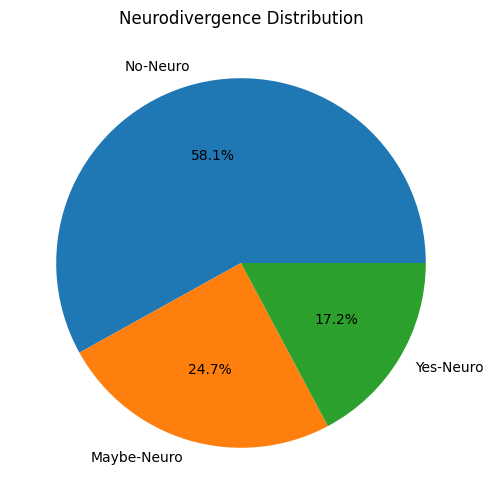

In [41]:
# Pie Chart for Neurodivergence
import pandas as pd
import matplotlib.pyplot as plt

# Read data
df = pd.read_csv('/content/UConn_SJI_signed_onehot.csv')

# Regroup neurodivergence categories
def recode_neuro(val):
    if val in [
        "Yes, and I have an accommodation at my university",
        "Yes, and I do not have an accommodation"
    ]:
        return "Yes-Neuro"
    elif val == "No":
        return "No-Neuro"
    elif val == "I think I might be but do not have a diagnosis":
        return "Maybe-Neuro"
    else:
        return None

df["NeuroGroup"] = df["DQ4"].apply(recode_neuro)

# Count responses
neuro_counts = df["NeuroGroup"].value_counts()
neuro_counts

# Pie Chart
plt.figure(figsize=(6, 6))
plt.pie(neuro_counts, labels=neuro_counts.index, autopct='%1.1f%%')
plt.title("Neurodivergence Distribution")
plt.show()



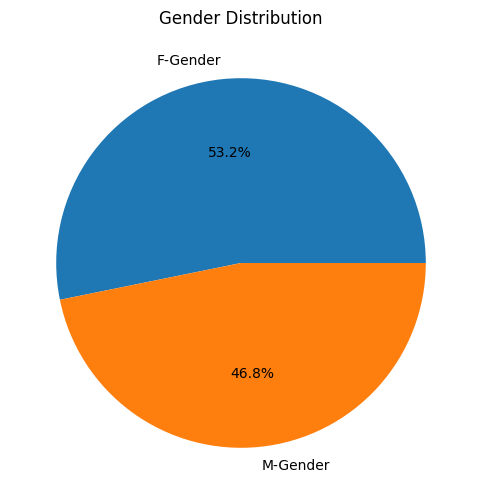

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('/content/UConn_SJI_signed_onehot.csv')

# Recode gender categories
def recode_gender(val):
    if val == "Woman":
        return "F-Gender"
    elif val == "Man":
        return "M-Gender"
    else:
        return None

df["GenderGroup"] = df["DQ5"].apply(recode_gender)

# Count valid categories
gender_counts = df["GenderGroup"].value_counts()
gender_counts

# Pie Chart
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%')
plt.title("Gender Distribution")
plt.show()



### Question 1 Choice 3

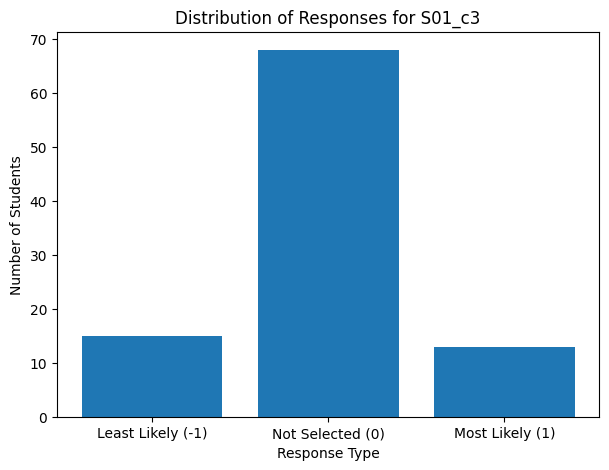

,count
S01_c3,
-1,15
0,68
1,13


In [43]:
# Most and Least Likely Distributions

import pandas as pd
import matplotlib.pyplot as plt

# Read dataset
df = pd.read_csv('/content/UConn_SJI_signed_onehot.csv')

# S01_c3 Values
values = df["S01_c3"].value_counts().sort_index()

# Rename the categories
labels = {
    -1: "Least Likely (-1)",
     0: "Not Selected (0)",
     1: "Most Likely (1)"
}

# Convert index
plot_labels = [labels[val] for val in values.index]

# Bar Chart
plt.figure(figsize=(7,5))
plt.bar(plot_labels, values)
plt.title("Distribution of Responses for S01_c3")
plt.ylabel("Number of Students")
plt.xlabel("Response Type")
plt.show()

# Print values counts
values


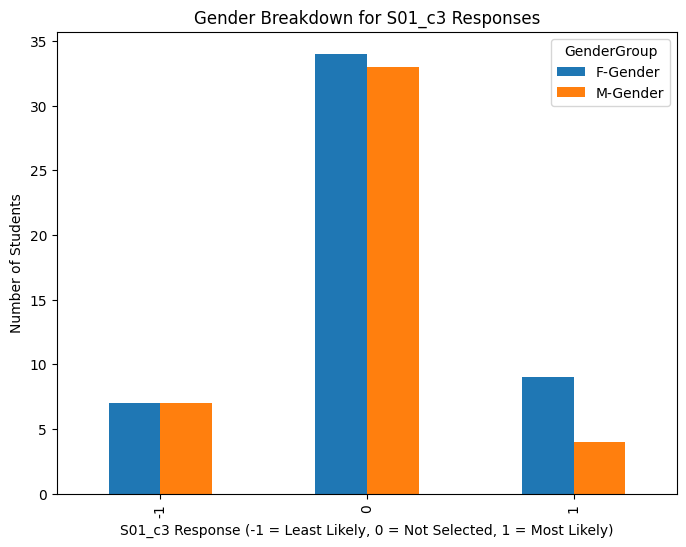

GenderGroup,F-Gender,M-Gender
S01_c3,,
-1,7,7
0,34,33
1,9,4


In [44]:
# Gender Breakdown
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('/content/UConn_SJI_signed_onehot.csv')

# Recode gender
def recode_gender(val):
    if val == "Woman":
        return "F-Gender"
    elif val == "Man":
        return "M-Gender"
    else:
        return None

df["GenderGroup"] = df["DQ5"].apply(recode_gender)

# Filter valid rows
df_valid = df.dropna(subset=["GenderGroup", "S01_c3"])

# Count gender by S01_c3 (-1, 0, 1)
gender_by_response = df_valid.groupby(["S01_c3", "GenderGroup"]).size().unstack(fill_value=0)

# Bar Chart
gender_by_response.plot(kind="bar", figsize=(8,6))
plt.title("Gender Breakdown for S01_c3 Responses")
plt.xlabel("S01_c3 Response (-1 = Least Likely, 0 = Not Selected, 1 = Most Likely)")
plt.ylabel("Number of Students")
plt.show()

# Print raw counts
gender_by_response

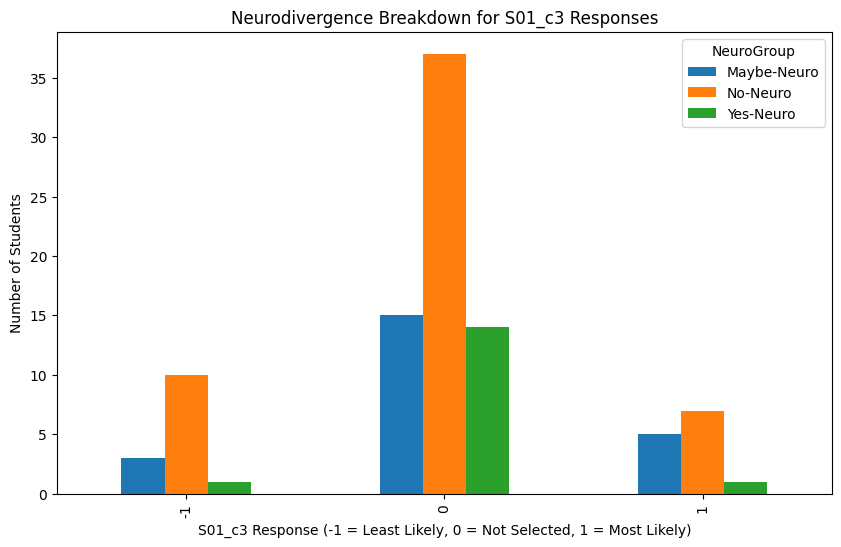

NeuroGroup,Maybe-Neuro,No-Neuro,Yes-Neuro
S01_c3,,,
-1,3,10,1
0,15,37,14
1,5,7,1


In [45]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('/content/UConn_SJI_signed_onehot.csv')

# Recode neurodivergence
def recode_neuro(val):
    if val in [
        "Yes, and I have an accommodation at my university",
        "Yes, and I do not have an accommodation"
    ]:
        return "Yes-Neuro"
    elif val == "No":
        return "No-Neuro"
    elif val == "I think I might be but do not have a diagnosis":
        return "Maybe-Neuro"
    else:
        return None  # drop prefer not to answer / unexpected

df["NeuroGroup"] = df["DQ4"].apply(recode_neuro)

# Filter valid rows
df_valid = df.dropna(subset=["NeuroGroup", "S01_c3"])

# Count neuro group by S01_c3 (-1, 0, 1)
neuro_by_response = df_valid.groupby(["S01_c3", "NeuroGroup"]).size().unstack(fill_value=0)

# === Bar Chart ===
neuro_by_response.plot(kind="bar", figsize=(10,6))
plt.title("Neurodivergence Breakdown for S01_c3 Responses")
plt.xlabel("S01_c3 Response (-1 = Least Likely, 0 = Not Selected, 1 = Most Likely)")
plt.ylabel("Number of Students")
plt.show()

# Print raw counts
neuro_by_response


###Question 1 Choice 4

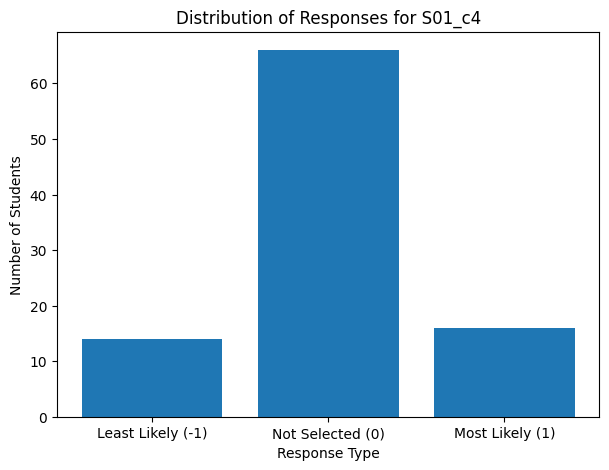

,count
S01_c4,
-1,14
0,66
1,16


In [46]:
import pandas as pd
import matplotlib.pyplot as plt

# Read dataset
df = pd.read_csv('/content/UConn_SJI_signed_onehot.csv')

# S01_c4 Values
values = df["S01_c4"].value_counts().sort_index()

# Rename the categories
labels = {
    -1: "Least Likely (-1)",
     0: "Not Selected (0)",
     1: "Most Likely (1)"
}

# Convert index
plot_labels = [labels[val] for val in values.index]

# Bar Chart
plt.figure(figsize=(7,5))
plt.bar(plot_labels, values)
plt.title("Distribution of Responses for S01_c4")
plt.ylabel("Number of Students")
plt.xlabel("Response Type")
plt.show()

# Print values counts
values


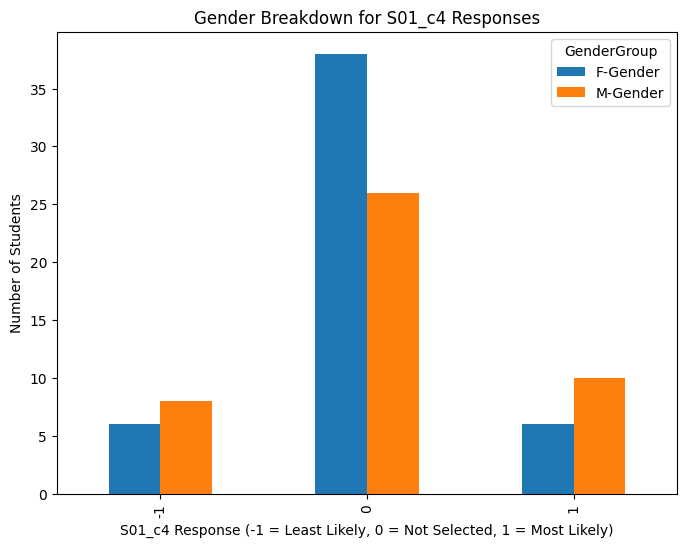

GenderGroup,F-Gender,M-Gender
S01_c4,,
-1,6,8
0,38,26
1,6,10


In [47]:
# Gender Breakdown
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('/content/UConn_SJI_signed_onehot.csv')

# Recode gender
def recode_gender(val):
    if val == "Woman":
        return "F-Gender"
    elif val == "Man":
        return "M-Gender"
    else:
        return None

df["GenderGroup"] = df["DQ5"].apply(recode_gender)

# Filter valid rows
df_valid = df.dropna(subset=["GenderGroup", "S01_c4"])

# Count gender by S01_c4 (-1, 0, 1)
gender_by_response = df_valid.groupby(["S01_c4", "GenderGroup"]).size().unstack(fill_value=0)

# Bar Chart
gender_by_response.plot(kind="bar", figsize=(8,6))
plt.title("Gender Breakdown for S01_c4 Responses")
plt.xlabel("S01_c4 Response (-1 = Least Likely, 0 = Not Selected, 1 = Most Likely)")
plt.ylabel("Number of Students")
plt.show()

# Print raw counts
gender_by_response


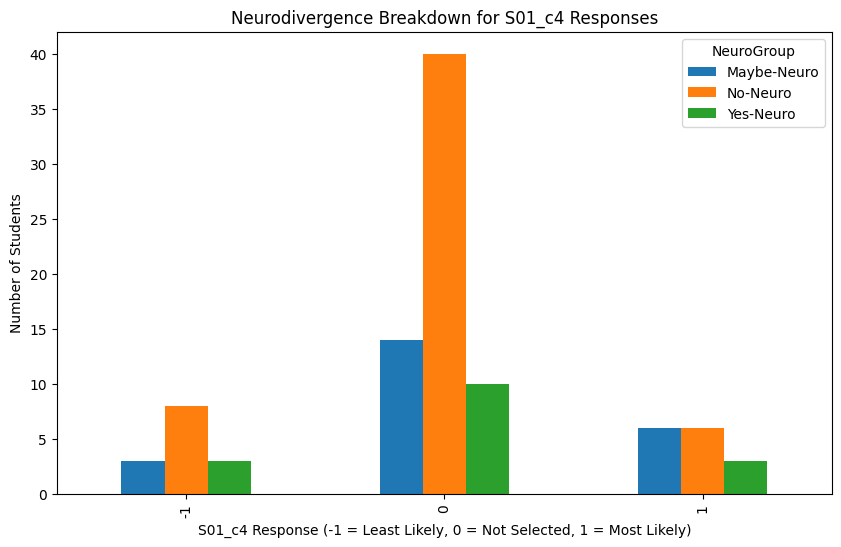

NeuroGroup,Maybe-Neuro,No-Neuro,Yes-Neuro
S01_c4,,,
-1,3,8,3
0,14,40,10
1,6,6,3


In [48]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('/content/UConn_SJI_signed_onehot.csv')

# Recode neurodivergence
def recode_neuro(val):
    if val in [
        "Yes, and I have an accommodation at my university",
        "Yes, and I do not have an accommodation"
    ]:
        return "Yes-Neuro"
    elif val == "No":
        return "No-Neuro"
    elif val == "I think I might be but do not have a diagnosis":
        return "Maybe-Neuro"
    else:
        return None  # drop prefer not to answer / unexpected

df["NeuroGroup"] = df["DQ4"].apply(recode_neuro)

# Filter valid rows
df_valid = df.dropna(subset=["NeuroGroup", "S01_c4"])

# Count neuro group by S01_c4 (-1, 0, 1)
neuro_by_response = df_valid.groupby(["S01_c4", "NeuroGroup"]).size().unstack(fill_value=0)

# === Bar Chart ===
neuro_by_response.plot(kind="bar", figsize=(10,6))
plt.title("Neurodivergence Breakdown for S01_c4 Responses")
plt.xlabel("S01_c4 Response (-1 = Least Likely, 0 = Not Selected, 1 = Most Likely)")
plt.ylabel("Number of Students")
plt.show()

# Print raw counts
neuro_by_response


###Question 1 Choice 5

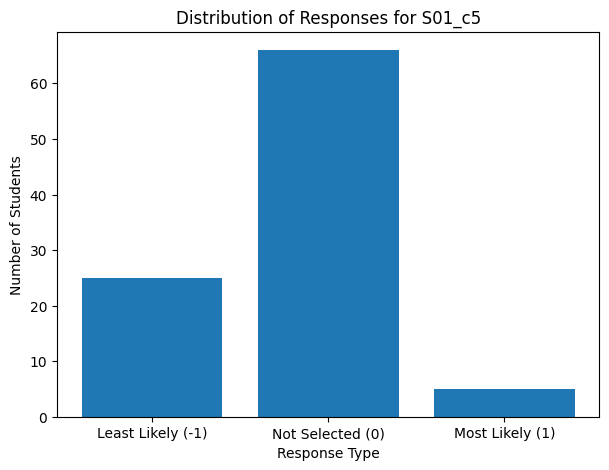

,count
S01_c5,
-1,25
0,66
1,5


In [49]:
import pandas as pd
import matplotlib.pyplot as plt

# Read dataset
df = pd.read_csv('/content/UConn_SJI_signed_onehot.csv')

# S01_c5 Values
values = df["S01_c5"].value_counts().sort_index()

# Rename the categories
labels = {
    -1: "Least Likely (-1)",
     0: "Not Selected (0)",
     1: "Most Likely (1)"
}

# Convert index
plot_labels = [labels[val] for val in values.index]

# Bar Chart
plt.figure(figsize=(7,5))
plt.bar(plot_labels, values)
plt.title("Distribution of Responses for S01_c5")
plt.ylabel("Number of Students")
plt.xlabel("Response Type")
plt.show()

# Print values counts
values


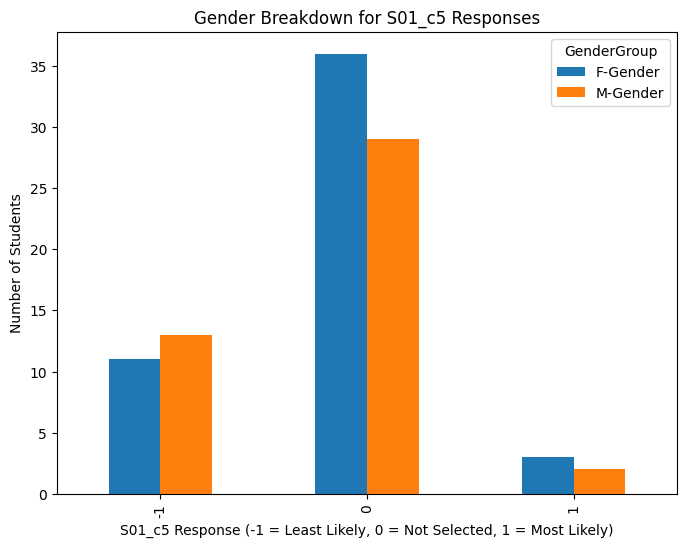

GenderGroup,F-Gender,M-Gender
S01_c5,,
-1,11,13
0,36,29
1,3,2


In [50]:
# Gender Breakdown

import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('/content/UConn_SJI_signed_onehot.csv')

# Recode gender
def recode_gender(val):
    if val == "Woman":
        return "F-Gender"
    elif val == "Man":
        return "M-Gender"
    else:
        return None

df["GenderGroup"] = df["DQ5"].apply(recode_gender)

# Filter valid rows
df_valid = df.dropna(subset=["GenderGroup", "S01_c5"])

# Count gender by S01_c5 (-1, 0, 1)
gender_by_response = df_valid.groupby(["S01_c5", "GenderGroup"]).size().unstack(fill_value=0)

# Bar Chart
gender_by_response.plot(kind="bar", figsize=(8,6))
plt.title("Gender Breakdown for S01_c5 Responses")
plt.xlabel("S01_c5 Response (-1 = Least Likely, 0 = Not Selected, 1 = Most Likely)")
plt.ylabel("Number of Students")
plt.show()

# Print raw counts
gender_by_response


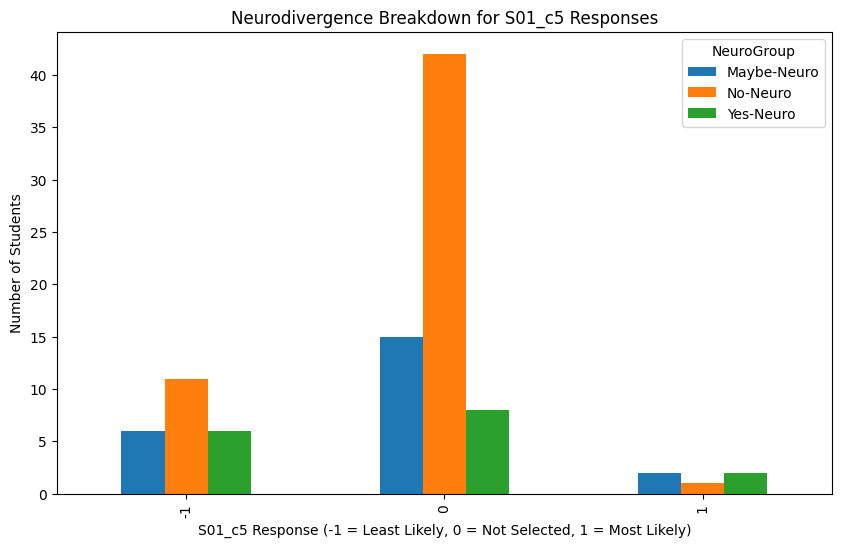

NeuroGroup,Maybe-Neuro,No-Neuro,Yes-Neuro
S01_c5,,,
-1,6,11,6
0,15,42,8
1,2,1,2


In [51]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('/content/UConn_SJI_signed_onehot.csv')

# Recode neurodivergence
def recode_neuro(val):
    if val in [
        "Yes, and I have an accommodation at my university",
        "Yes, and I do not have an accommodation"
    ]:
        return "Yes-Neuro"
    elif val == "No":
        return "No-Neuro"
    elif val == "I think I might be but do not have a diagnosis":
        return "Maybe-Neuro"
    else:
        return None  # drop prefer not to answer / unexpected

df["NeuroGroup"] = df["DQ4"].apply(recode_neuro)

# Filter valid rows
df_valid = df.dropna(subset=["NeuroGroup", "S01_c5"])

# Count neuro group by S01_c5 (-1, 0, 1)
neuro_by_response = df_valid.groupby(["S01_c5", "NeuroGroup"]).size().unstack(fill_value=0)

# === Bar Chart ===
neuro_by_response.plot(kind="bar", figsize=(10,6))
plt.title("Neurodivergence Breakdown for S01_c5 Responses")
plt.xlabel("S01_c5 Response (-1 = Least Likely, 0 = Not Selected, 1 = Most Likely)")
plt.ylabel("Number of Students")
plt.show()

# Print raw counts
neuro_by_response


###Question 7 Choice 3

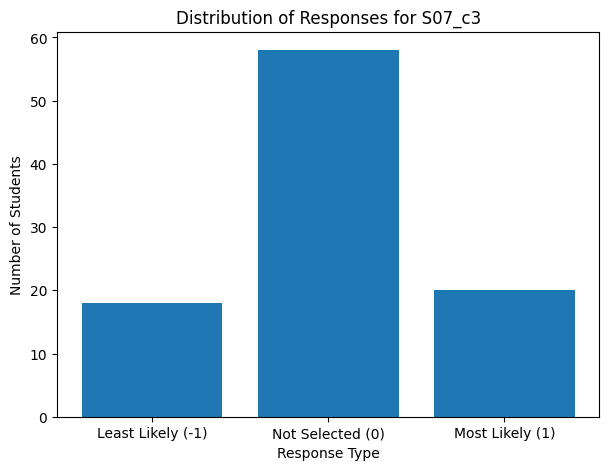

,count
S07_c3,
-1,18
0,58
1,20


In [52]:
import pandas as pd
import matplotlib.pyplot as plt

# Read dataset
df = pd.read_csv('/content/UConn_SJI_signed_onehot.csv')

# S07_c3 Values
values = df["S07_c3"].value_counts().sort_index()

# Rename the categories
labels = {
    -1: "Least Likely (-1)",
     0: "Not Selected (0)",
     1: "Most Likely (1)"
}

# Convert index
plot_labels = [labels[val] for val in values.index]

# Bar Chart
plt.figure(figsize=(7,5))
plt.bar(plot_labels, values)
plt.title("Distribution of Responses for S07_c3")
plt.ylabel("Number of Students")
plt.xlabel("Response Type")
plt.show()

# Print values counts
values


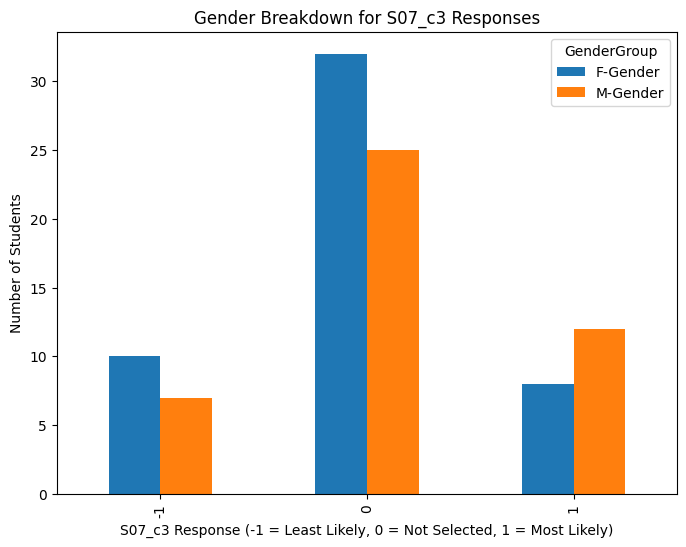

GenderGroup,F-Gender,M-Gender
S07_c3,,
-1,10,7
0,32,25
1,8,12


In [53]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('/content/UConn_SJI_signed_onehot.csv')

# Recode gender
def recode_gender(val):
    if val == "Woman":
        return "F-Gender"
    elif val == "Man":
        return "M-Gender"
    else:
        return None

df["GenderGroup"] = df["DQ5"].apply(recode_gender)

# Filter valid rows
df_valid = df.dropna(subset=["GenderGroup", "S07_c3"])

# Count gender by S07_c3 (-1, 0, 1)
gender_by_response = df_valid.groupby(["S07_c3", "GenderGroup"]).size().unstack(fill_value=0)

# Bar Chart
gender_by_response.plot(kind="bar", figsize=(8,6))
plt.title("Gender Breakdown for S07_c3 Responses")
plt.xlabel("S07_c3 Response (-1 = Least Likely, 0 = Not Selected, 1 = Most Likely)")
plt.ylabel("Number of Students")
plt.show()

# Print raw counts
gender_by_response


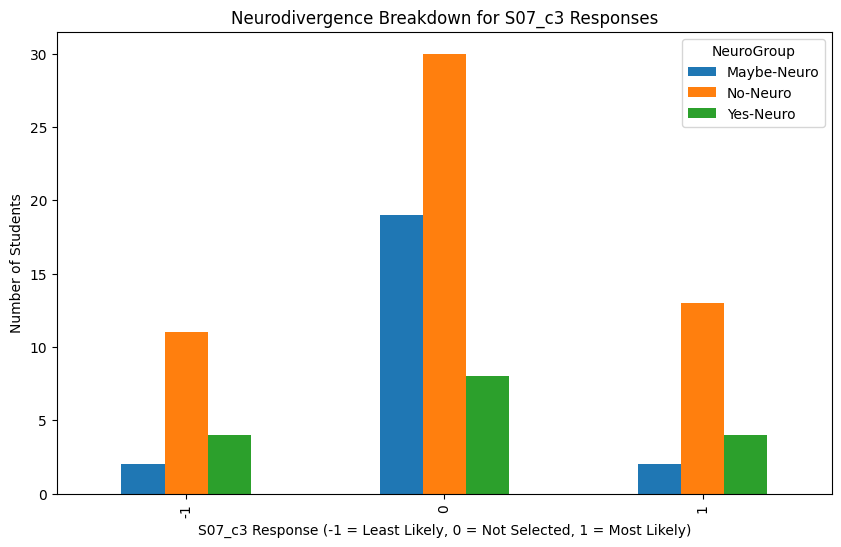

NeuroGroup,Maybe-Neuro,No-Neuro,Yes-Neuro
S07_c3,,,
-1,2,11,4
0,19,30,8
1,2,13,4


In [54]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('/content/UConn_SJI_signed_onehot.csv')

# Recode neurodivergence
def recode_neuro(val):
    if val in [
        "Yes, and I have an accommodation at my university",
        "Yes, and I do not have an accommodation"
    ]:
        return "Yes-Neuro"
    elif val == "No":
        return "No-Neuro"
    elif val == "I think I might be but do not have a diagnosis":
        return "Maybe-Neuro"
    else:
        return None  # drop prefer not to answer / unexpected

df["NeuroGroup"] = df["DQ4"].apply(recode_neuro)

# Filter valid rows
df_valid = df.dropna(subset=["NeuroGroup", "S07_c3"])

# Count neuro group by S07_c3 (-1, 0, 1)
neuro_by_response = df_valid.groupby(["S07_c3", "NeuroGroup"]).size().unstack(fill_value=0)

# Bar Chart
neuro_by_response.plot(kind="bar", figsize=(10,6))
plt.title("Neurodivergence Breakdown for S07_c3 Responses")
plt.xlabel("S07_c3 Response (-1 = Least Likely, 0 = Not Selected, 1 = Most Likely)")
plt.ylabel("Number of Students")
plt.show()

# Print raw counts
neuro_by_response


###Question 7 Choice 4

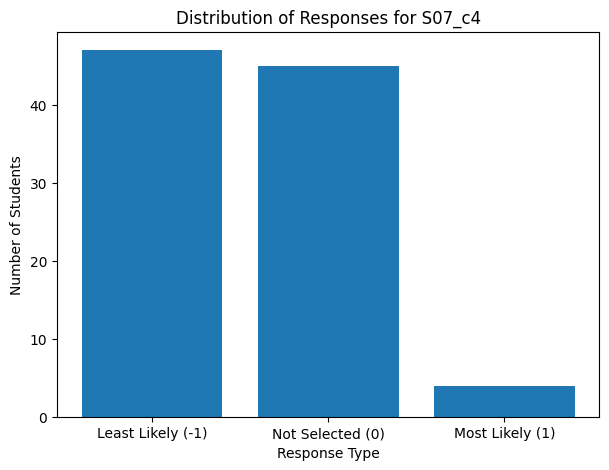

,count
S07_c4,
-1,47
0,45
1,4


In [55]:
import pandas as pd
import matplotlib.pyplot as plt

# Read dataset
df = pd.read_csv('/content/UConn_SJI_signed_onehot.csv')

# S07_c4 Values
values = df["S07_c4"].value_counts().sort_index()

# Rename the categories
labels = {
    -1: "Least Likely (-1)",
     0: "Not Selected (0)",
     1: "Most Likely (1)"
}

# Convert index
plot_labels = [labels[val] for val in values.index]

# Bar Chart
plt.figure(figsize=(7,5))
plt.bar(plot_labels, values)
plt.title("Distribution of Responses for S07_c4")
plt.ylabel("Number of Students")
plt.xlabel("Response Type")
plt.show()

# Print values counts
values


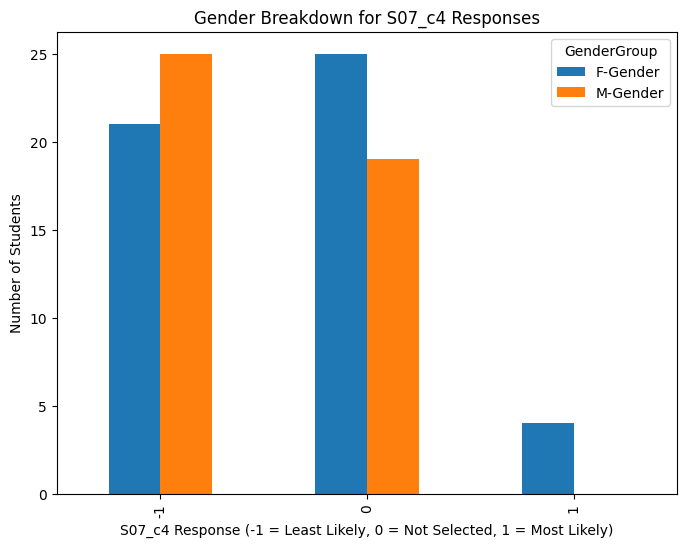

GenderGroup,F-Gender,M-Gender
S07_c4,,
-1,21,25
0,25,19
1,4,0


In [56]:
# Gender
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('/content/UConn_SJI_signed_onehot.csv')

# Recode gender
def recode_gender(val):
    if val == "Woman":
        return "F-Gender"
    elif val == "Man":
        return "M-Gender"
    else:
        return None

df["GenderGroup"] = df["DQ5"].apply(recode_gender)

# Filter valid rows
df_valid = df.dropna(subset=["GenderGroup", "S07_c4"])

# Count gender by S07_c4 (-1, 0, 1)
gender_by_response = df_valid.groupby(["S07_c4", "GenderGroup"]).size().unstack(fill_value=0)

# Bar Chart
gender_by_response.plot(kind="bar", figsize=(8,6))
plt.title("Gender Breakdown for S07_c4 Responses")
plt.xlabel("S07_c4 Response (-1 = Least Likely, 0 = Not Selected, 1 = Most Likely)")
plt.ylabel("Number of Students")
plt.show()

# Print raw counts
gender_by_response


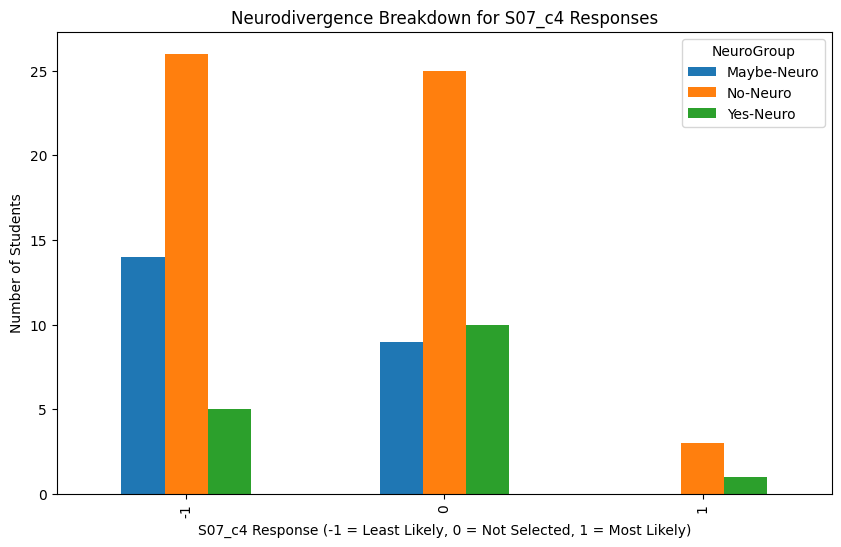

NeuroGroup,Maybe-Neuro,No-Neuro,Yes-Neuro
S07_c4,,,
-1,14,26,5
0,9,25,10
1,0,3,1


In [57]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('/content/UConn_SJI_signed_onehot.csv')

# Recode neurodivergence
def recode_neuro(val):
    if val in [
        "Yes, and I have an accommodation at my university",
        "Yes, and I do not have an accommodation"
    ]:
        return "Yes-Neuro"
    elif val == "No":
        return "No-Neuro"
    elif val == "I think I might be but do not have a diagnosis":
        return "Maybe-Neuro"
    else:
        return None  # drop prefer not to answer / unexpected

df["NeuroGroup"] = df["DQ4"].apply(recode_neuro)

# Filter valid rows
df_valid = df.dropna(subset=["NeuroGroup", "S07_c4"])

# Count neuro group by S07_c4 (-1, 0, 1)
neuro_by_response = df_valid.groupby(["S07_c4", "NeuroGroup"]).size().unstack(fill_value=0)

# Bar Chart
neuro_by_response.plot(kind="bar", figsize=(10,6))
plt.title("Neurodivergence Breakdown for S07_c4 Responses")
plt.xlabel("S07_c4 Response (-1 = Least Likely, 0 = Not Selected, 1 = Most Likely)")
plt.ylabel("Number of Students")
plt.show()

# Print raw counts
neuro_by_response


### Question 7 Choice 5

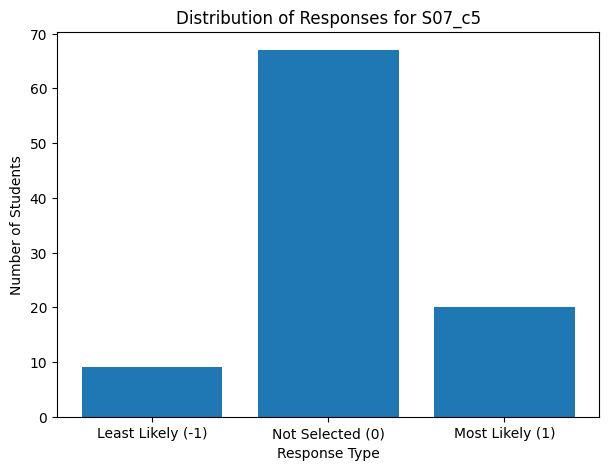

,count
S07_c5,
-1,9
0,67
1,20


In [58]:
import pandas as pd
import matplotlib.pyplot as plt

# Read dataset
df = pd.read_csv('/content/UConn_SJI_signed_onehot.csv')

# S07_c5 Values
values = df["S07_c5"].value_counts().sort_index()

# Rename the categories
labels = {
    -1: "Least Likely (-1)",
     0: "Not Selected (0)",
     1: "Most Likely (1)"
}

# Convert index
plot_labels = [labels[val] for val in values.index]

# Bar Chart
plt.figure(figsize=(7,5))
plt.bar(plot_labels, values)
plt.title("Distribution of Responses for S07_c5")
plt.ylabel("Number of Students")
plt.xlabel("Response Type")
plt.show()

# Print values counts
values


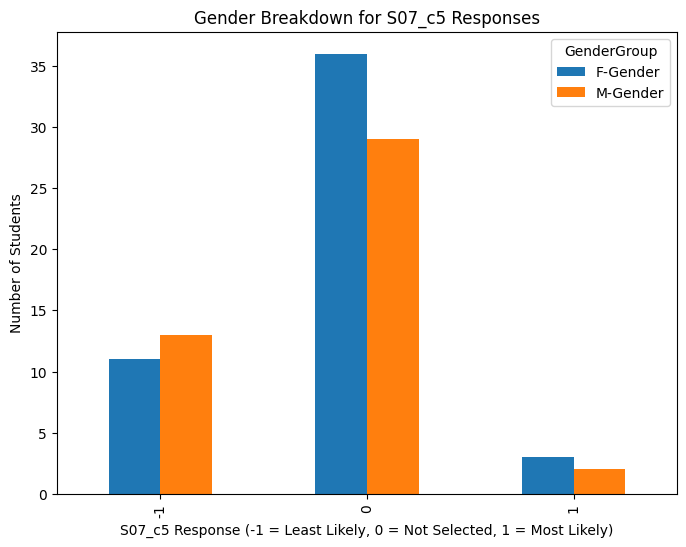

GenderGroup,F-Gender,M-Gender
S01_c5,,
-1,11,13
0,36,29
1,3,2


In [59]:
# Gender
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('/content/UConn_SJI_signed_onehot.csv')

# Recode gender
def recode_gender(val):
    if val == "Woman":
        return "F-Gender"
    elif val == "Man":
        return "M-Gender"
    else:
        return None

df["GenderGroup"] = df["DQ5"].apply(recode_gender)

# Filter valid rows
df_valid = df.dropna(subset=["GenderGroup", "S07_c5"])

# Count gender by S07_c5 (-1, 0, 1)
gender_by_response = df_valid.groupby(["S01_c5", "GenderGroup"]).size().unstack(fill_value=0)

# Bar Chart
gender_by_response.plot(kind="bar", figsize=(8,6))
plt.title("Gender Breakdown for S07_c5 Responses")
plt.xlabel("S07_c5 Response (-1 = Least Likely, 0 = Not Selected, 1 = Most Likely)")
plt.ylabel("Number of Students")
plt.show()

# Print raw counts
gender_by_response


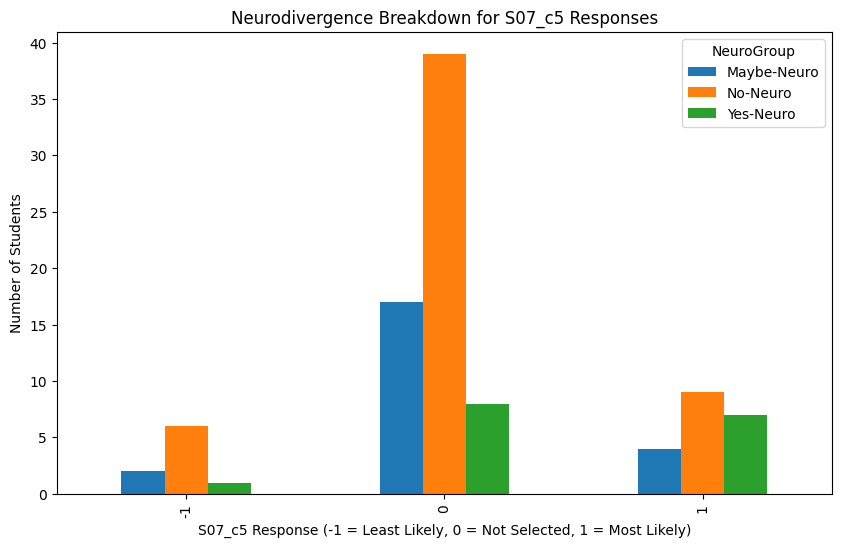

NeuroGroup,Maybe-Neuro,No-Neuro,Yes-Neuro
S07_c5,,,
-1,2,6,1
0,17,39,8
1,4,9,7


In [60]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('/content/UConn_SJI_signed_onehot.csv')

# Recode neurodivergence
def recode_neuro(val):
    if val in [
        "Yes, and I have an accommodation at my university",
        "Yes, and I do not have an accommodation"
    ]:
        return "Yes-Neuro"
    elif val == "No":
        return "No-Neuro"
    elif val == "I think I might be but do not have a diagnosis":
        return "Maybe-Neuro"
    else:
        return None  # drop prefer not to answer / unexpected

df["NeuroGroup"] = df["DQ4"].apply(recode_neuro)

# Filter valid rows
df_valid = df.dropna(subset=["NeuroGroup", "S07_c5"])

# Count neuro group by S07_c5 (-1, 0, 1)
neuro_by_response = df_valid.groupby(["S07_c5", "NeuroGroup"]).size().unstack(fill_value=0)

# Bar Chart
neuro_by_response.plot(kind="bar", figsize=(10,6))
plt.title("Neurodivergence Breakdown for S07_c5 Responses")
plt.xlabel("S07_c5 Response (-1 = Least Likely, 0 = Not Selected, 1 = Most Likely)")
plt.ylabel("Number of Students")
plt.show()

# Print raw counts
neuro_by_response


###Question 10 Choice 3

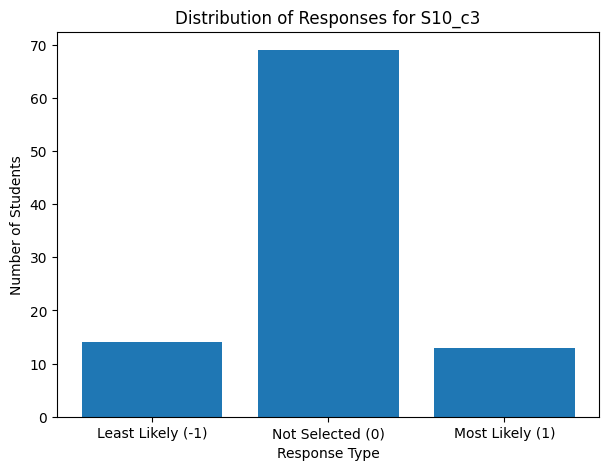

,count
S10_c3,
-1,14
0,69
1,13


In [61]:
import pandas as pd
import matplotlib.pyplot as plt

# Read dataset
df = pd.read_csv('/content/UConn_SJI_signed_onehot.csv')

# S10_c3 Values
values = df["S10_c3"].value_counts().sort_index()

# Rename the categories
labels = {
    -1: "Least Likely (-1)",
     0: "Not Selected (0)",
     1: "Most Likely (1)"
}

# Convert index
plot_labels = [labels[val] for val in values.index]

# Bar Chart
plt.figure(figsize=(7,5))
plt.bar(plot_labels, values)
plt.title("Distribution of Responses for S10_c3")
plt.ylabel("Number of Students")
plt.xlabel("Response Type")
plt.show()

# Print values counts
values


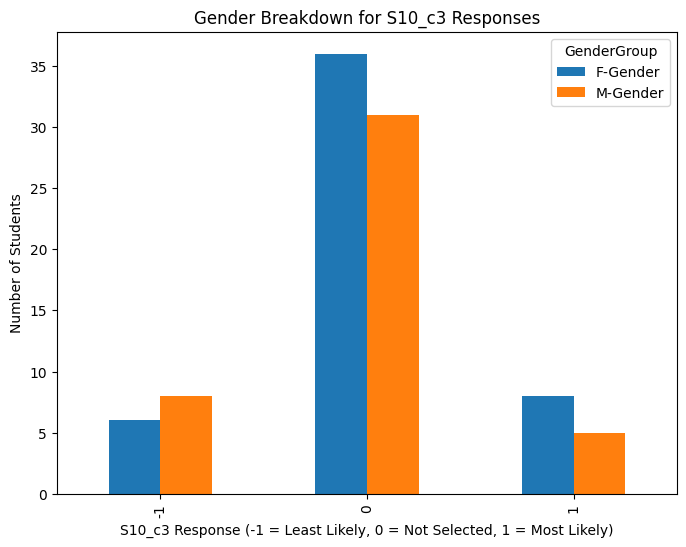

GenderGroup,F-Gender,M-Gender
S10_c3,,
-1,6,8
0,36,31
1,8,5


In [62]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('/content/UConn_SJI_signed_onehot.csv')

# Recode gender
def recode_gender(val):
    if val == "Woman":
        return "F-Gender"
    elif val == "Man":
        return "M-Gender"
    else:
        return None

df["GenderGroup"] = df["DQ5"].apply(recode_gender)

# Filter valid rows
df_valid = df.dropna(subset=["GenderGroup", "S10_c3"])

# Count gender by S10_c3 (-1, 0, 1)
gender_by_response = df_valid.groupby(["S10_c3", "GenderGroup"]).size().unstack(fill_value=0)

# Bar Chart
gender_by_response.plot(kind="bar", figsize=(8,6))
plt.title("Gender Breakdown for S10_c3 Responses")
plt.xlabel("S10_c3 Response (-1 = Least Likely, 0 = Not Selected, 1 = Most Likely)")
plt.ylabel("Number of Students")
plt.show()

# Print raw counts
gender_by_response


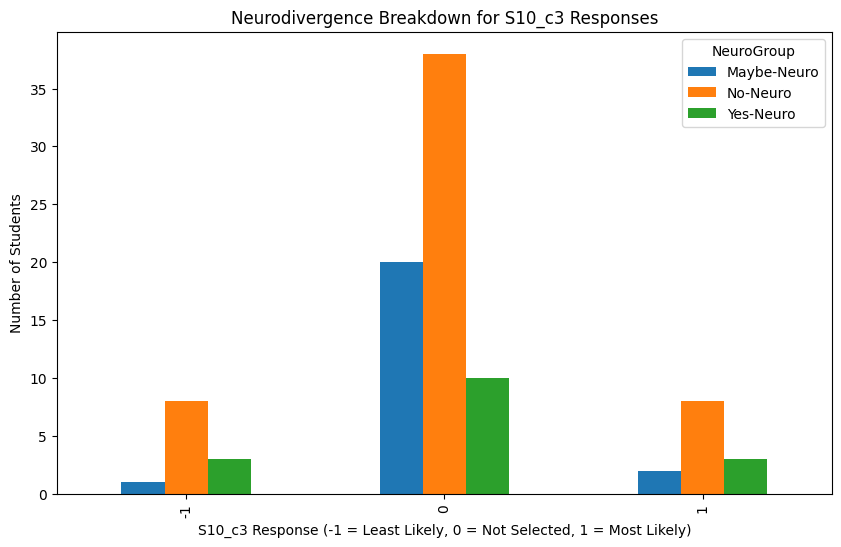

NeuroGroup,Maybe-Neuro,No-Neuro,Yes-Neuro
S10_c3,,,
-1,1,8,3
0,20,38,10
1,2,8,3


In [63]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('/content/UConn_SJI_signed_onehot.csv')

# Recode neurodivergence
def recode_neuro(val):
    if val in [
        "Yes, and I have an accommodation at my university",
        "Yes, and I do not have an accommodation"
    ]:
        return "Yes-Neuro"
    elif val == "No":
        return "No-Neuro"
    elif val == "I think I might be but do not have a diagnosis":
        return "Maybe-Neuro"
    else:
        return None  # drop prefer not to answer / unexpected

df["NeuroGroup"] = df["DQ4"].apply(recode_neuro)

# Filter valid rows
df_valid = df.dropna(subset=["NeuroGroup", "S10_c3"])

# Count neuro group by S10_c3 (-1, 0, 1)
neuro_by_response = df_valid.groupby(["S10_c3", "NeuroGroup"]).size().unstack(fill_value=0)

# === Bar Chart ===
neuro_by_response.plot(kind="bar", figsize=(10,6))
plt.title("Neurodivergence Breakdown for S10_c3 Responses")
plt.xlabel("S10_c3 Response (-1 = Least Likely, 0 = Not Selected, 1 = Most Likely)")
plt.ylabel("Number of Students")
plt.show()

# Print raw counts
neuro_by_response


###Question 10 Choice 4

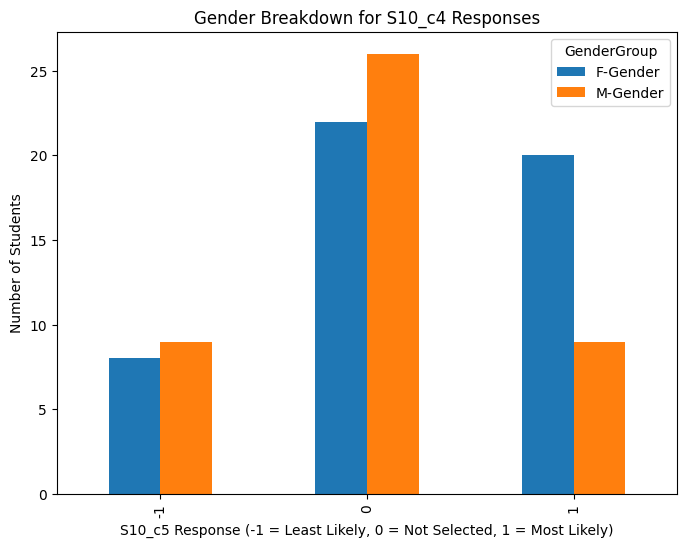

GenderGroup,F-Gender,M-Gender
S10_c4,,
-1,8,9
0,22,26
1,20,9


In [64]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('/content/UConn_SJI_signed_onehot.csv')

# Recode gender
def recode_gender(val):
    if val == "Woman":
        return "F-Gender"
    elif val == "Man":
        return "M-Gender"
    else:
        return None

df["GenderGroup"] = df["DQ5"].apply(recode_gender)

# Filter valid rows
df_valid = df.dropna(subset=["GenderGroup", "S10_c5"])

# Count gender by S10_c5 (-1, 0, 1)
gender_by_response = df_valid.groupby(["S10_c4", "GenderGroup"]).size().unstack(fill_value=0)

# Bar Chart
gender_by_response.plot(kind="bar", figsize=(8,6))
plt.title("Gender Breakdown for S10_c4 Responses")
plt.xlabel("S10_c5 Response (-1 = Least Likely, 0 = Not Selected, 1 = Most Likely)")
plt.ylabel("Number of Students")
plt.show()

# Print raw counts
gender_by_response


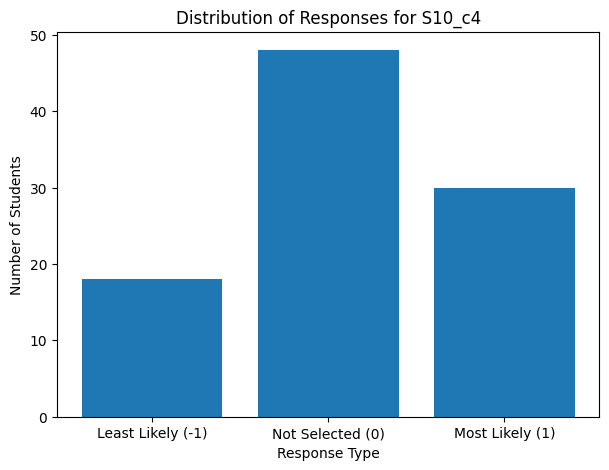

,count
S10_c4,
-1,18
0,48
1,30


In [65]:
import pandas as pd
import matplotlib.pyplot as plt

# Read dataset
df = pd.read_csv('/content/UConn_SJI_signed_onehot.csv')

# S10_c4 Values
values = df["S10_c4"].value_counts().sort_index()

# Rename the categories
labels = {
    -1: "Least Likely (-1)",
     0: "Not Selected (0)",
     1: "Most Likely (1)"
}

# Convert index
plot_labels = [labels[val] for val in values.index]

# Bar Chart
plt.figure(figsize=(7,5))
plt.bar(plot_labels, values)
plt.title("Distribution of Responses for S10_c4")
plt.ylabel("Number of Students")
plt.xlabel("Response Type")
plt.show()

# Print values counts
values


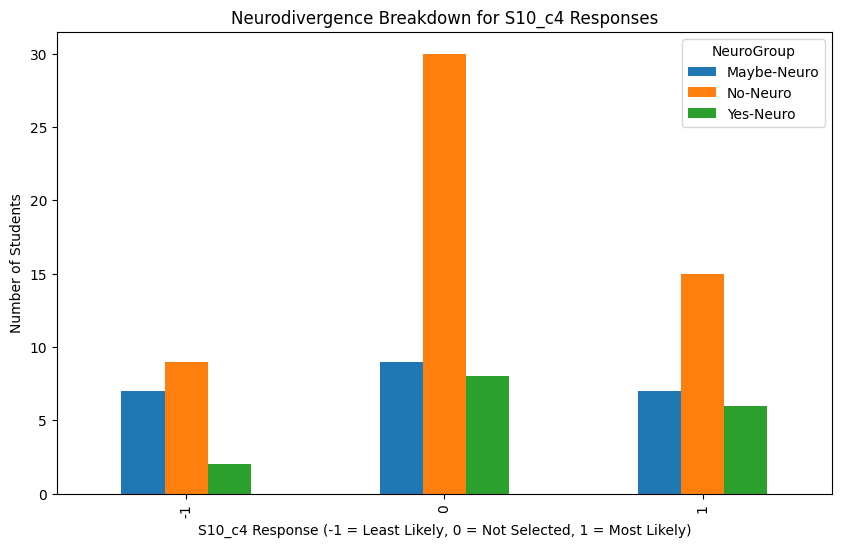

NeuroGroup,Maybe-Neuro,No-Neuro,Yes-Neuro
S10_c4,,,
-1,7,9,2
0,9,30,8
1,7,15,6


In [66]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('/content/UConn_SJI_signed_onehot.csv')

# Recode neurodivergence
def recode_neuro(val):
    if val in [
        "Yes, and I have an accommodation at my university",
        "Yes, and I do not have an accommodation"
    ]:
        return "Yes-Neuro"
    elif val == "No":
        return "No-Neuro"
    elif val == "I think I might be but do not have a diagnosis":
        return "Maybe-Neuro"
    else:
        return None  # drop prefer not to answer / unexpected

df["NeuroGroup"] = df["DQ4"].apply(recode_neuro)

# Filter valid rows
df_valid = df.dropna(subset=["NeuroGroup", "S10_c4"])

# Count neuro group by S10_c4 (-1, 0, 1)
neuro_by_response = df_valid.groupby(["S10_c4", "NeuroGroup"]).size().unstack(fill_value=0)

# === Bar Chart ===
neuro_by_response.plot(kind="bar", figsize=(10,6))
plt.title("Neurodivergence Breakdown for S10_c4 Responses")
plt.xlabel("S10_c4 Response (-1 = Least Likely, 0 = Not Selected, 1 = Most Likely)")
plt.ylabel("Number of Students")
plt.show()

# Print raw counts
neuro_by_response


###Question 10 Choice 5

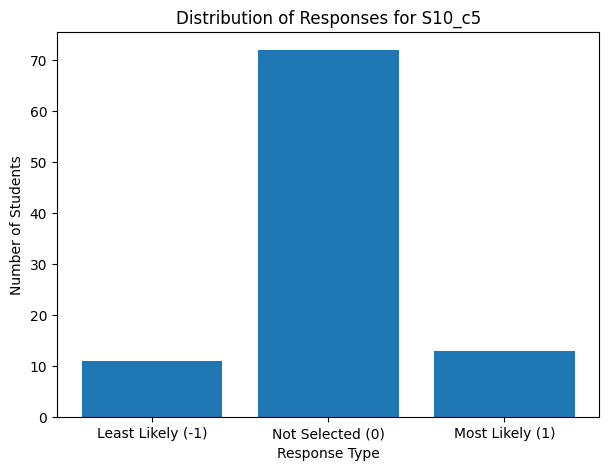

,count
S10_c5,
-1,11
0,72
1,13


In [67]:
import pandas as pd
import matplotlib.pyplot as plt

# Read dataset
df = pd.read_csv('/content/UConn_SJI_signed_onehot.csv')

# S10_c5 Values
values = df["S10_c5"].value_counts().sort_index()

# Rename the categories
labels = {
    -1: "Least Likely (-1)",
     0: "Not Selected (0)",
     1: "Most Likely (1)"
}

# Convert index
plot_labels = [labels[val] for val in values.index]

# Bar Chart
plt.figure(figsize=(7,5))
plt.bar(plot_labels, values)
plt.title("Distribution of Responses for S10_c5")
plt.ylabel("Number of Students")
plt.xlabel("Response Type")
plt.show()

# Print values counts
values


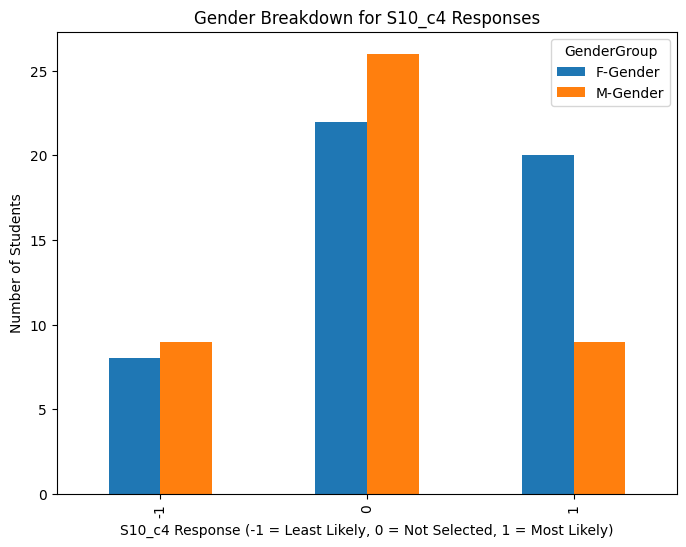

GenderGroup,F-Gender,M-Gender
S10_c4,,
-1,8,9
0,22,26
1,20,9


In [68]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('/content/UConn_SJI_signed_onehot.csv')

# Recode gender
def recode_gender(val):
    if val == "Woman":
        return "F-Gender"
    elif val == "Man":
        return "M-Gender"
    else:
        return None

df["GenderGroup"] = df["DQ5"].apply(recode_gender)

# Filter valid rows
df_valid = df.dropna(subset=["GenderGroup", "S10_c4"])

# Count gender by S10_c4 (-1, 0, 1)
gender_by_response = df_valid.groupby(["S10_c4", "GenderGroup"]).size().unstack(fill_value=0)

# Bar Chart
gender_by_response.plot(kind="bar", figsize=(8,6))
plt.title("Gender Breakdown for S10_c4 Responses")
plt.xlabel("S10_c4 Response (-1 = Least Likely, 0 = Not Selected, 1 = Most Likely)")
plt.ylabel("Number of Students")
plt.show()

# Print raw counts
gender_by_response


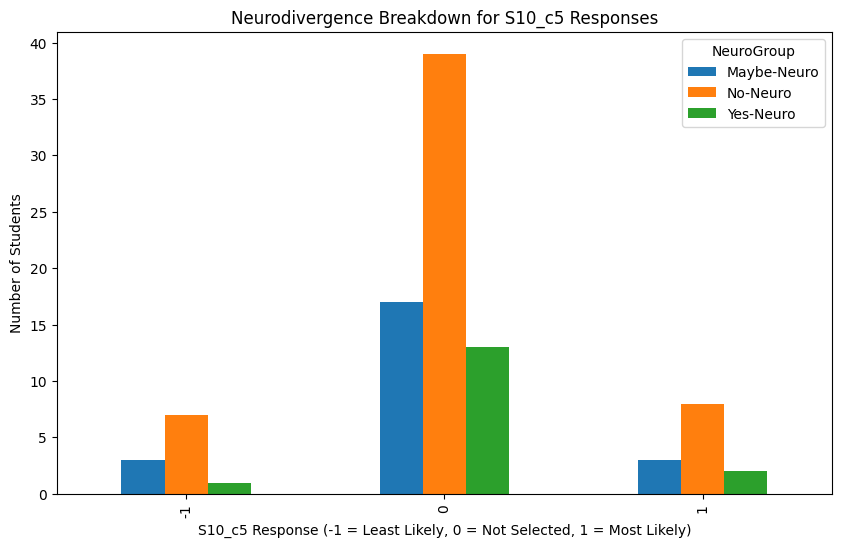

NeuroGroup,Maybe-Neuro,No-Neuro,Yes-Neuro
S10_c5,,,
-1,3,7,1
0,17,39,13
1,3,8,2


In [69]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('/content/UConn_SJI_signed_onehot.csv')

# Recode neurodivergence
def recode_neuro(val):
    if val in [
        "Yes, and I have an accommodation at my university",
        "Yes, and I do not have an accommodation"
    ]:
        return "Yes-Neuro"
    elif val == "No":
        return "No-Neuro"
    elif val == "I think I might be but do not have a diagnosis":
        return "Maybe-Neuro"
    else:
        return None  # drop prefer not to answer / unexpected

df["NeuroGroup"] = df["DQ4"].apply(recode_neuro)

# Filter valid rows
df_valid = df.dropna(subset=["NeuroGroup", "S10_c5"])

# Count neuro group by S10_c5 (-1, 0, 1)
neuro_by_response = df_valid.groupby(["S10_c5", "NeuroGroup"]).size().unstack(fill_value=0)

# Bar Chart
neuro_by_response.plot(kind="bar", figsize=(10,6))
plt.title("Neurodivergence Breakdown for S10_c5 Responses")
plt.xlabel("S10_c5 Response (-1 = Least Likely, 0 = Not Selected, 1 = Most Likely)")
plt.ylabel("Number of Students")
plt.show()

# Print raw counts
neuro_by_response
